In [1]:
from main import * 

filename = "feature_df_py.xlsx"  # df of files and factors

color_dict = {"pAD":"orange","Somatic":"blue","WASH":"lightsteelblue", "PRE":"black", "CONTROL": 'grey', "TCB2":'green', "DMT":"teal", "PSIL":"orange", "LSD":"purple", "MDL":'blue', 'I_display':'cornflowerblue'} 
saveColors(filename, color_dict) #cache colors relative to filename


COLORS {'pAD': 'orange', 'Somatic': 'blue', 'WASH': 'lightsteelblue', 'PRE': 'black', 'CONTROL': 'grey', 'TCB2': 'green', 'DMT': 'teal', 'PSIL': 'orange', 'LSD': 'purple', 'MDL': 'blue', 'I_display': 'cornflowerblue'} SAVED TO /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py SUBCACHE


In [ ]:
#check a specific file I and V plot
quick_plot_file(filename, 'JJB230911/t31')


In [5]:
# FEATURE DF --> EXPANDED DF

# subselect by cell type
# df = getExpandedSubsetDf(filename, 'L5a_TLX', from_scratch=True)

# complete
df = getExpandedDf(filename)          #if cached will just get delete cache to redo

# df[df['data_type']== 'FP'][['cell_id', 'data_type','WASH_Somatic_AP_locs', 'APP_pAD_AP_locs', 'AP_height']]
#show APP traces without AP's
# df[df['AP_locs'].apply(lambda x: isinstance(x, np.ndarray) and len(x) == 0 if isinstance(x, np.ndarray) else False)]

/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/expanded_df.pkl
GETTING "expanded_df" FROM "feature_df_py" CACHE


,folder_file,cell_id,data_type,drug,conc_uM,replication_no,application_order,drug_in,drug_out,I_set,...,PRE_pAD_AP_locs,AP_slope,AP_latency,sag,AP_width,AP_height,FI_slope,rheobased_threshold,voltage_threshold,error
0,JJB210406/t8,CTG210406a,FP,PRE,NaN,1,0,NaN,NaN,NaN,...,NaN,"[88.85249328613281, 89.65687561035156, 80.7468...","[1.0, 1.0, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.2]","[[0.06721071, -88.160126, 100.0, -73.1248], [0...","[1.9, 217.3, 461.0, 655.6, 892.9, 1111.9, 1336...","[88.85249, 89.656876, 88.82156, 90.05907, 90.2...",0.400000,77.500000,"[-42.3225, -42.8175, -42.786564, -44.024063, -...",ran
1,JJB210406/t9,CTG210406a,FP,PRE,NaN,2,0,NaN,NaN,NaN,...,NaN,"[92.13187408447266, 83.33437832919033, 92.1628...","[1.0, 1.1, 1.0, 1.1, 1.1, 1.0, 1.0, 1.0]","[[0.07890445, -88.553925, 100.0, -75.98009], [...","[1.8, 222.6, 479.5, 721.0, 935.8, 1191.6, 1428...","[92.131874, 91.667816, 92.16281, 91.51312, 91....",0.375000,98.222222,"[-42.66281, -42.167812, -42.66281, -42.724686,...",ran
2,JJB210406/t10,CTG210406a,FP,PRE,NaN,3,0,NaN,NaN,NaN,...,NaN,"[92.78156280517578, 84.375, 92.41030883789062,...","[1.0, 1.1, 1.0, 1.0, 1.0, 1.1, 1.1, 1.1, 1.1, ...","[[0.071824215, -88.76183, 100.0, -77.02342], [...","[1.9, 526.9, 948.8, 1.8, 163.6, 320.1, 489.4, ...","[92.78156, 92.8125, 92.41031, 89.19281, 90.739...",0.350000,110.476190,"[-41.301563, -41.672813, -41.765625, -39.69281...",ran
3,JJB210406/t11,CTG210406a,AP,DMT,NaN,1,1,11.0,20.0,holding_I,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ran
4,JJB210406/t16,CTG210406a,FP,DMT,NaN,1,1,NaN,NaN,NaN,...,NaN,"[90.09687635633681, 79.97343444824219, 87.8624...","[0.9, 1.0, 0.9, 1.0, 0.9]","[[0.060758516, -85.02094, 100.0, -70.78395], [...","[1.5, 283.2, 603.5, 933.7, 1350.7]","[81.08719, 79.973434, 79.07625, 80.80875, 79.9...",0.100000,50.000000,"[-39.3525, -38.115, -37.805626, -38.950314, -3...",ran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,JJB230911/t30,DRD230911d,FP,PRE,NaN,3,0,NaN,NaN,NaN,...,NaN,"[92.90531158447266, 82.23750027743252, 81.0562...","[1.0, 1.1, 1.1, 1.1, 1.2, 1.1]","[[0.15936701, -79.7124, 130.0, -78.85006], [0....","[1.8, 195.0, 410.2, 614.9, 817.8, 1016.8]","[92.90531, 90.46125, 89.16187, 89.06906, 88.41...",0.166667,74.000000,"[-41.115936, -40.095, -39.19781, -40.002186, -...",ran
1809,JJB230911/t31,DRD230911d,AP,LSD_CNQX_AP5,0.18,1,1,22.0,35.0,short step,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ran
1810,JJB230911/t32,DRD230911d,FP,LSD_CNQX_AP5,0.18,1,1,NaN,NaN,NaN,...,NaN,"[76.8374980579723, 75.57187167080966, 68.08827...","[1.1, 1.1, 1.2, 1.2, 1.2]","[[0.096053265, -73.45741, 130.0, -70.922325], ...","[1.6, 239.2, 504.1, 775.8, 1042.5]","[84.52125, 83.12906, 81.70593, 81.427505, 81.6...",0.166667,50.000000,"[-41.45625, -40.8375, -39.878437, -39.38344, -...",ran
1811,JJB230911/t33,DRD230911d,FP,LSD_CNQX_AP5,0.18,2,1,NaN,NaN,NaN,...,NaN,"[79.31250138716264, 76.69687444513494, 76.6406...","[1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.2, ...","[[0.13064161, -72.239815, 130.0, -70.725296], ...","[1.6, 434.5, 905.2, 1.6, 107.0, 248.4, 408.3, ...","[87.24375, 84.36656, 84.30469, 86.40843, 83.62...",0.166667,62.000000,"[-42.075, -40.156876, -40.12594, -42.19875, -4...",ran


/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/FP_stats.pkl
GETTING "FP_stats" FROM "feature_df_py" CACHE
Attempting to load data tracking from: /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/insufficient_data_tracking.json
/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/insufficient_data_tracking.json
plotting AP_height for L5a_CBL
Insufficient data for L5a_CBL - Treatments: PSIL_CNQX_AP5, TCB2 (n < 3)
Not enough remaining treatments for L5a_CBL - AP_height
plotting AP_latency for L5a_CBL
Insufficient data for L5a_CBL - Treatments: PSIL_CNQX_AP5, TCB2 (n < 3)
Not enough remaining treatments for L5a_CBL - AP_latency
plotting AP_slope for L5a_CBL
Insufficient data for L5a_CBL - Treatments: PSIL_CNQX_AP5, TCB2 (n < 3)
Not enough remaining treatments for L5a_CBL - AP_slope
plotting AP_width for L5a_CBL
Insufficient data for L5a_CBL - Treatments: PSIL_CNQX_AP5, TCB2 (n < 3)
Not enough remaining treatments for L5a_CBL - AP_width
plotting max

/Users/jasminebutler/Desktop/IGOR_phd/module/plotters.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  Fig, ax = plt.subplots(figsize=(20, 10))


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6_HUM_AP_slope.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6_HUM_AP_slope.png
plotting AP_width for L6_HUM
Saving data tracking to: /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/insufficient_data_tracking.json
DATA TRACKING {'L5a_CBL': {'PSIL_CNQX_AP5': {'FP_n': 1}, 'TCB2': {'FP_n': 1}}, 'L5a_TLX': {'': {'FP_n': 1}, 'LSD_CNQX_AP5': {'FP_n': 1}, 'PSIL_CNQX_AP5': {'FP_n': 2}}, 'L5b_SIM': {'DMT': {'FP_n': 2}, 'PSIL': {'FP_n': 2}}, 'L6b_5HT2A': {'TCB2': {'FP_n': 2}}, 'L6b_CTG': {'LSD': {'FP_n': 2}}, 'L6b_DRD': {'CONTROL_CNQX_AP5': {'FP_n': 1}, 'LSD_CNQX_AP5': {'FP_n': 1}, 'MDL': {'FP_n': 1}, 'PSIL_CNQX_AP5': {'FP_n': 2}}} SAVED TO /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py SUBCACHE
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6_HUM_AP_width.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6_HUM_AP_width.png
plotting max

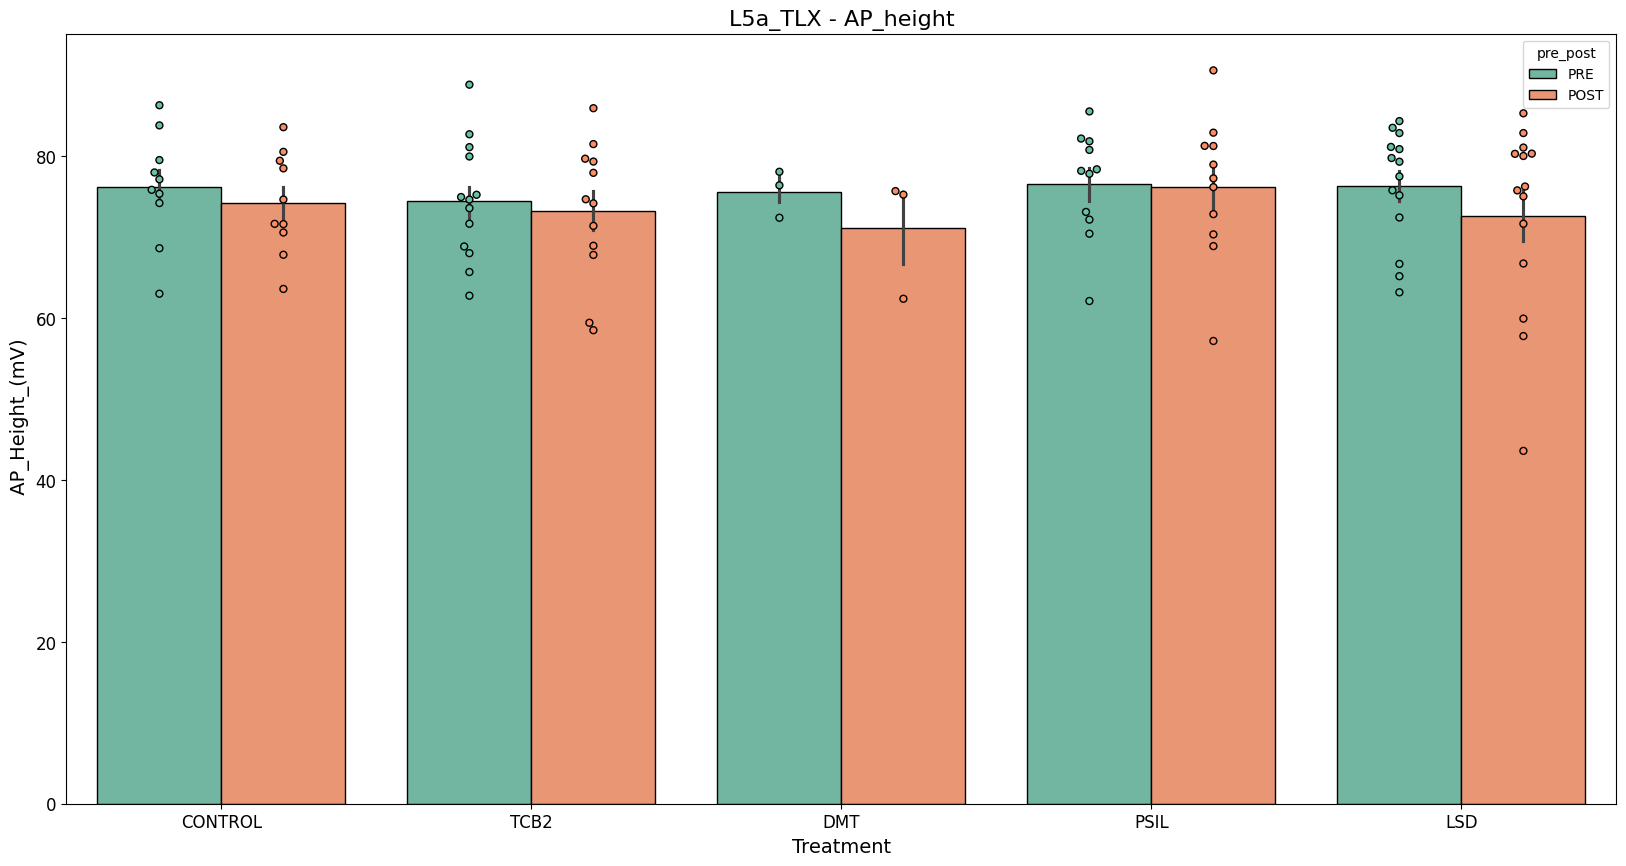

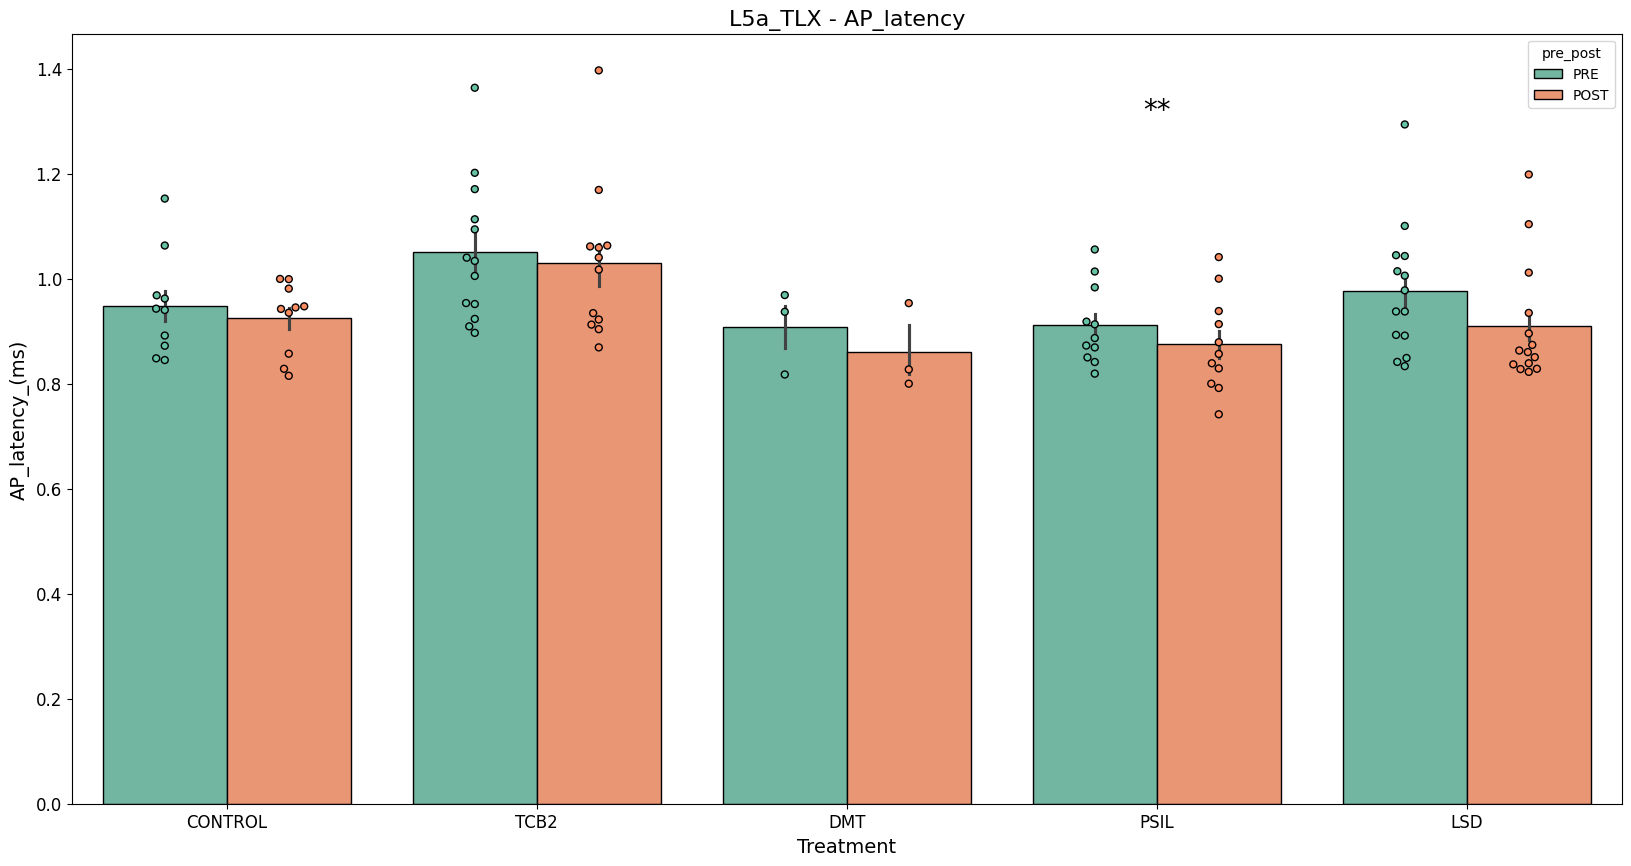

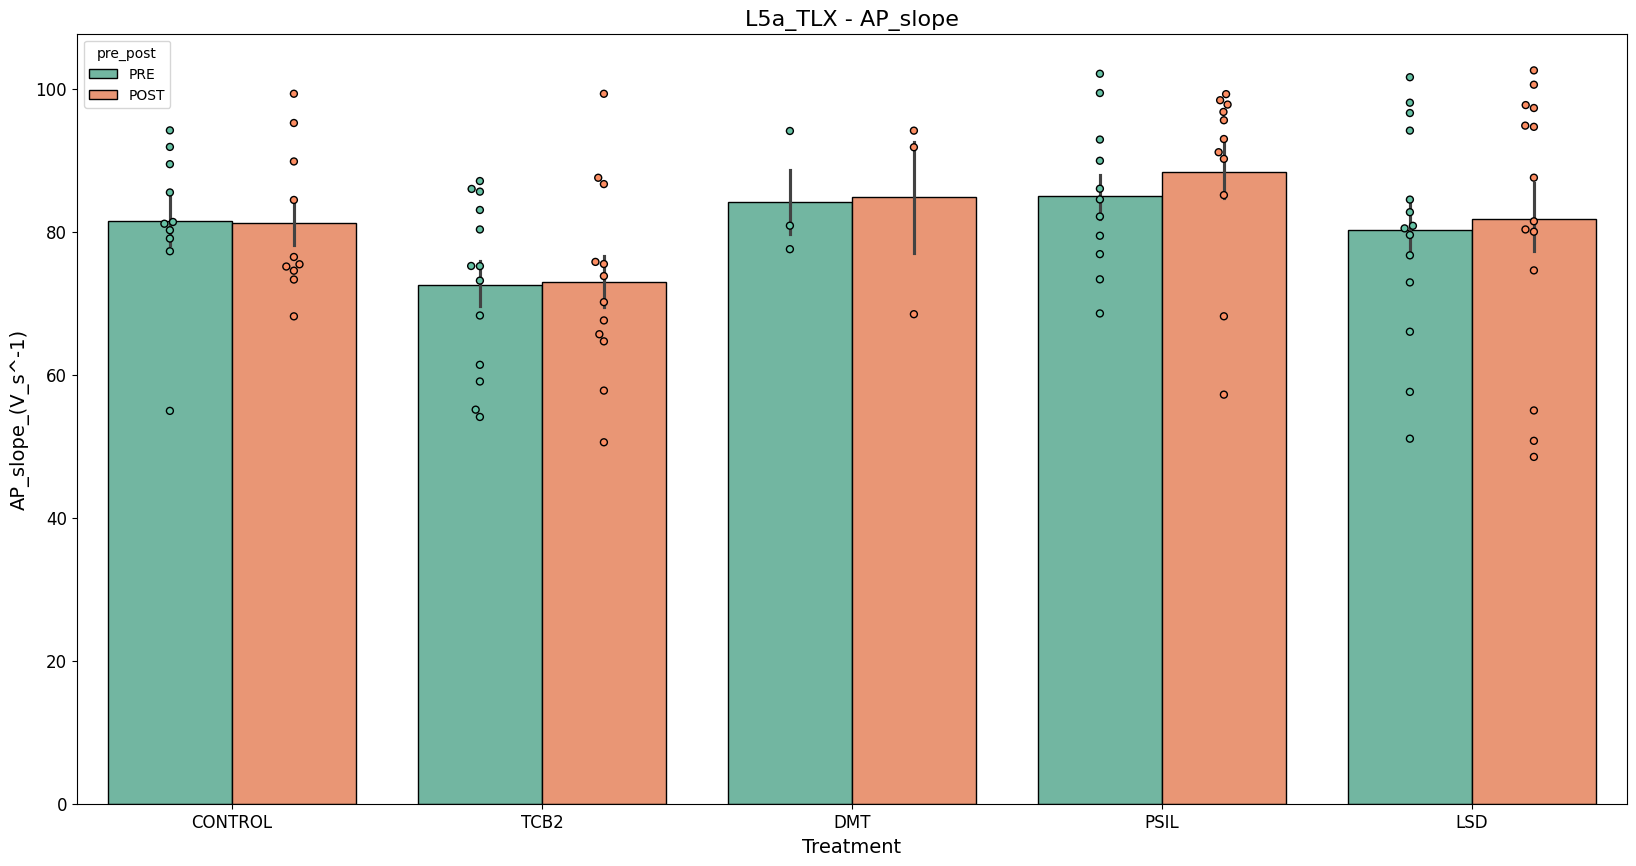

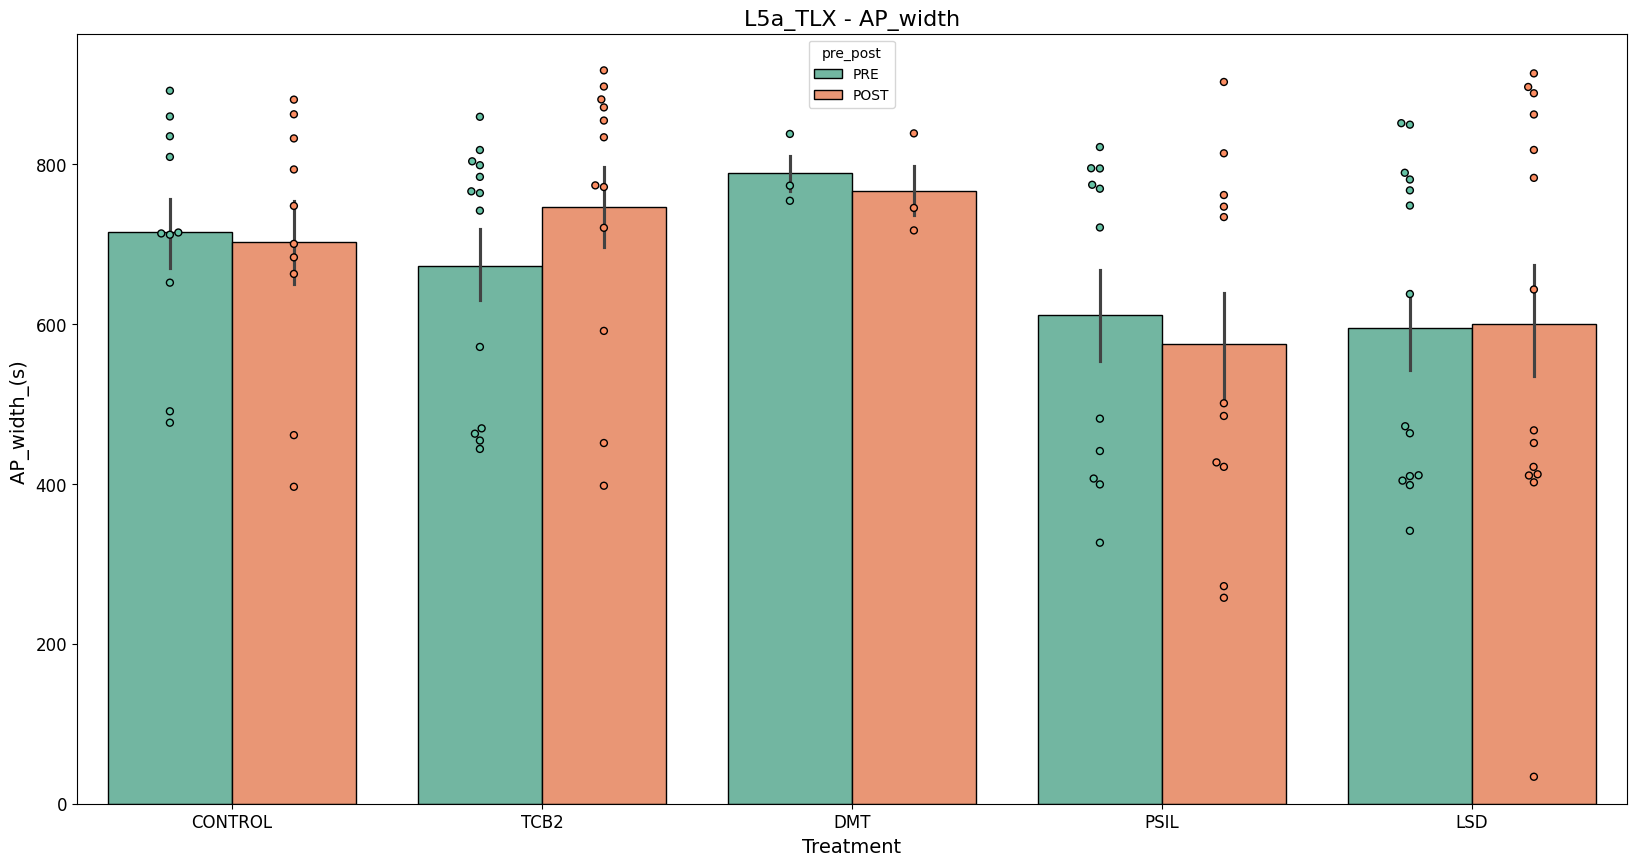

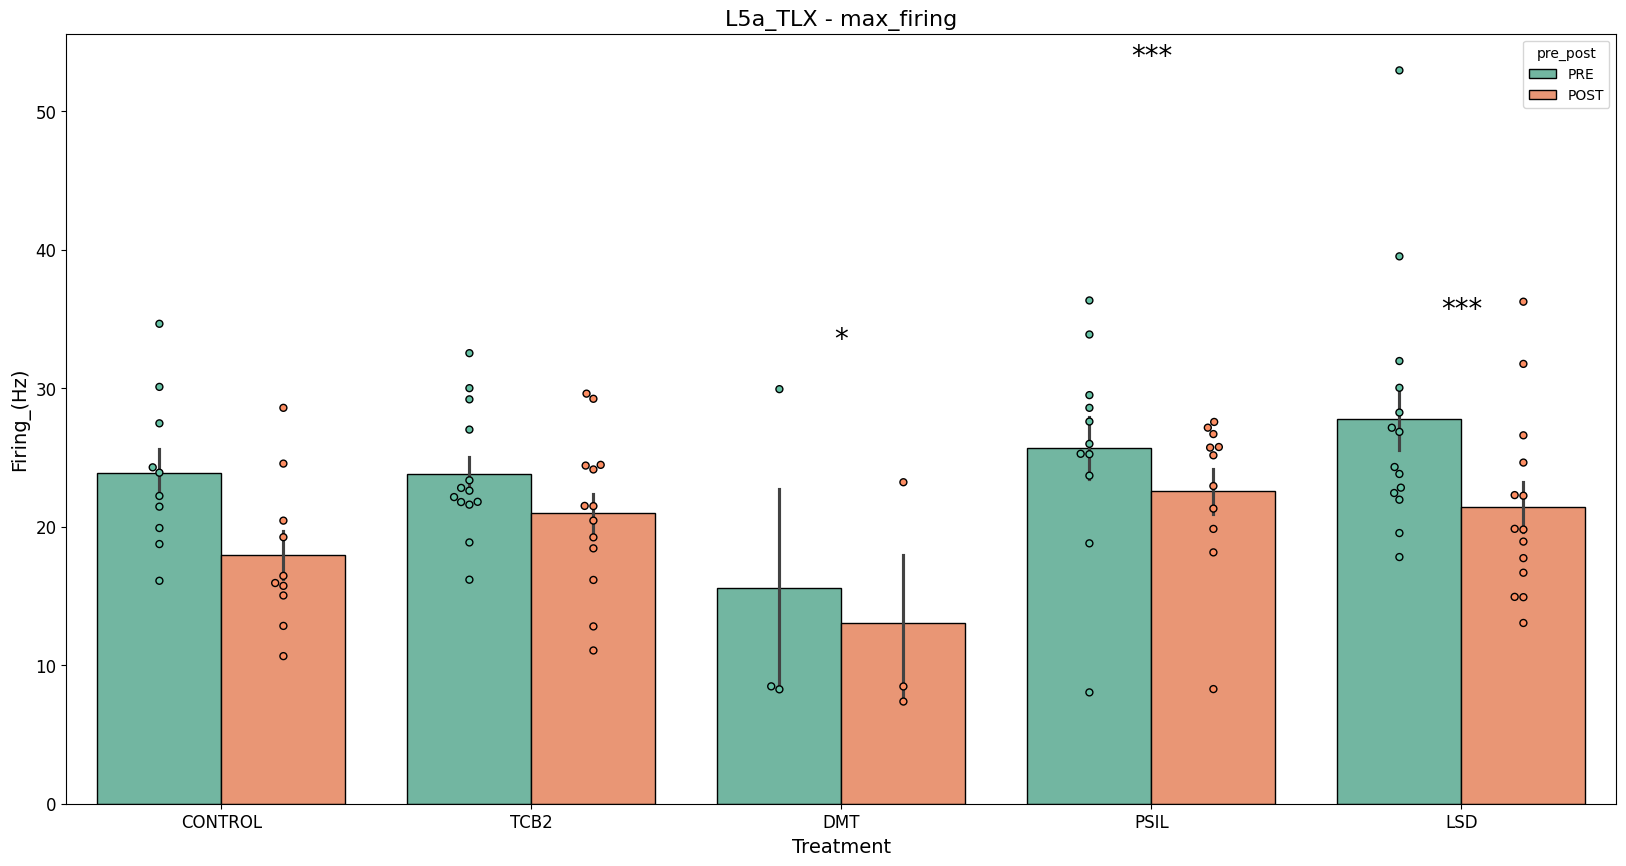

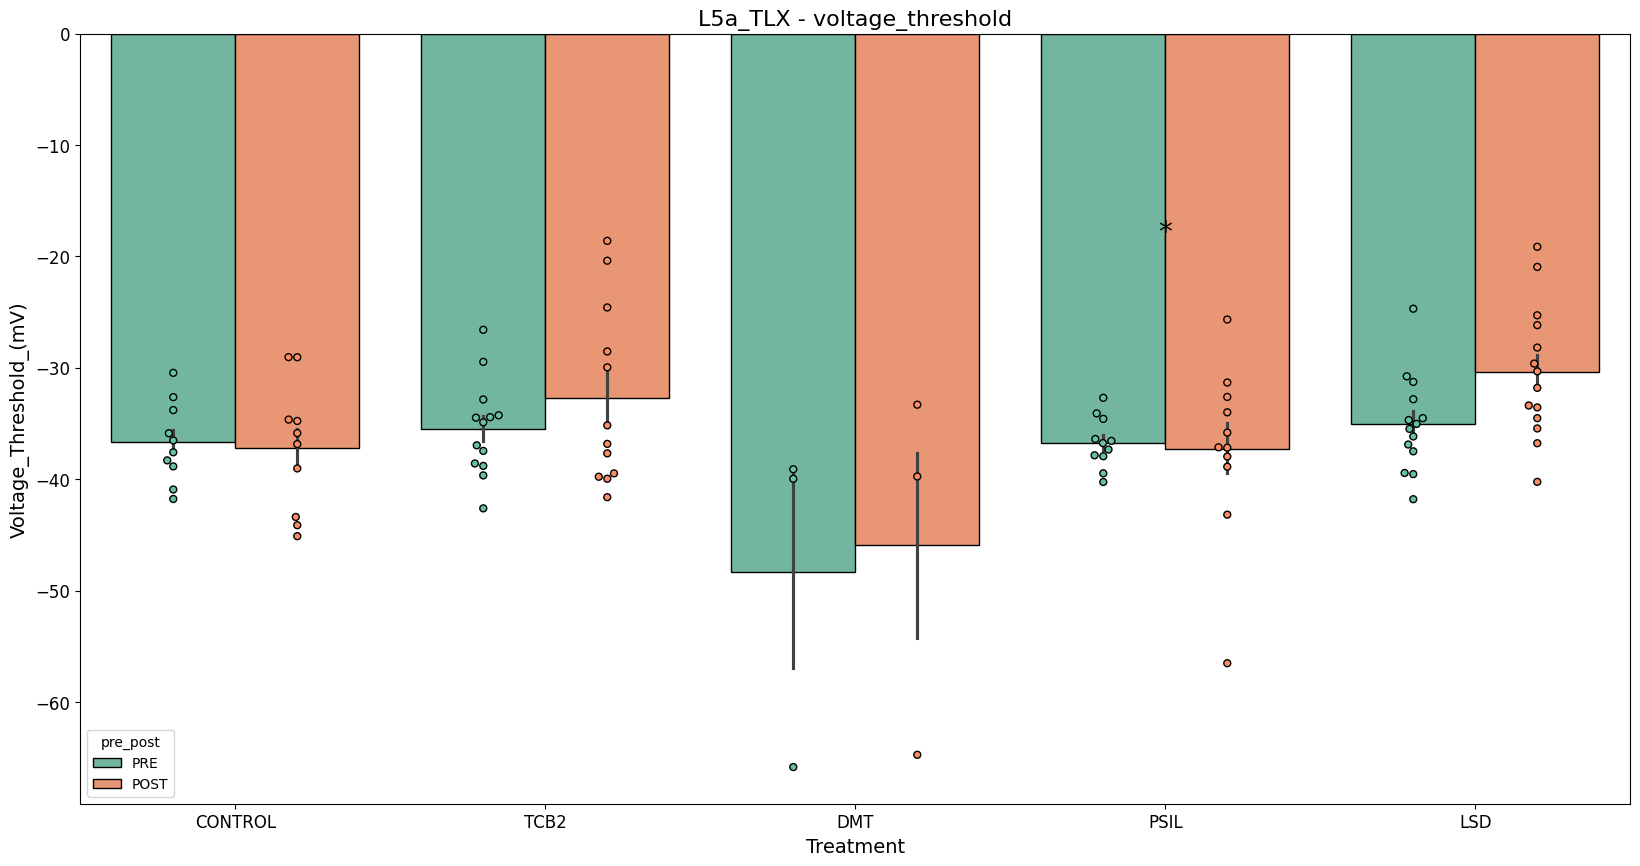

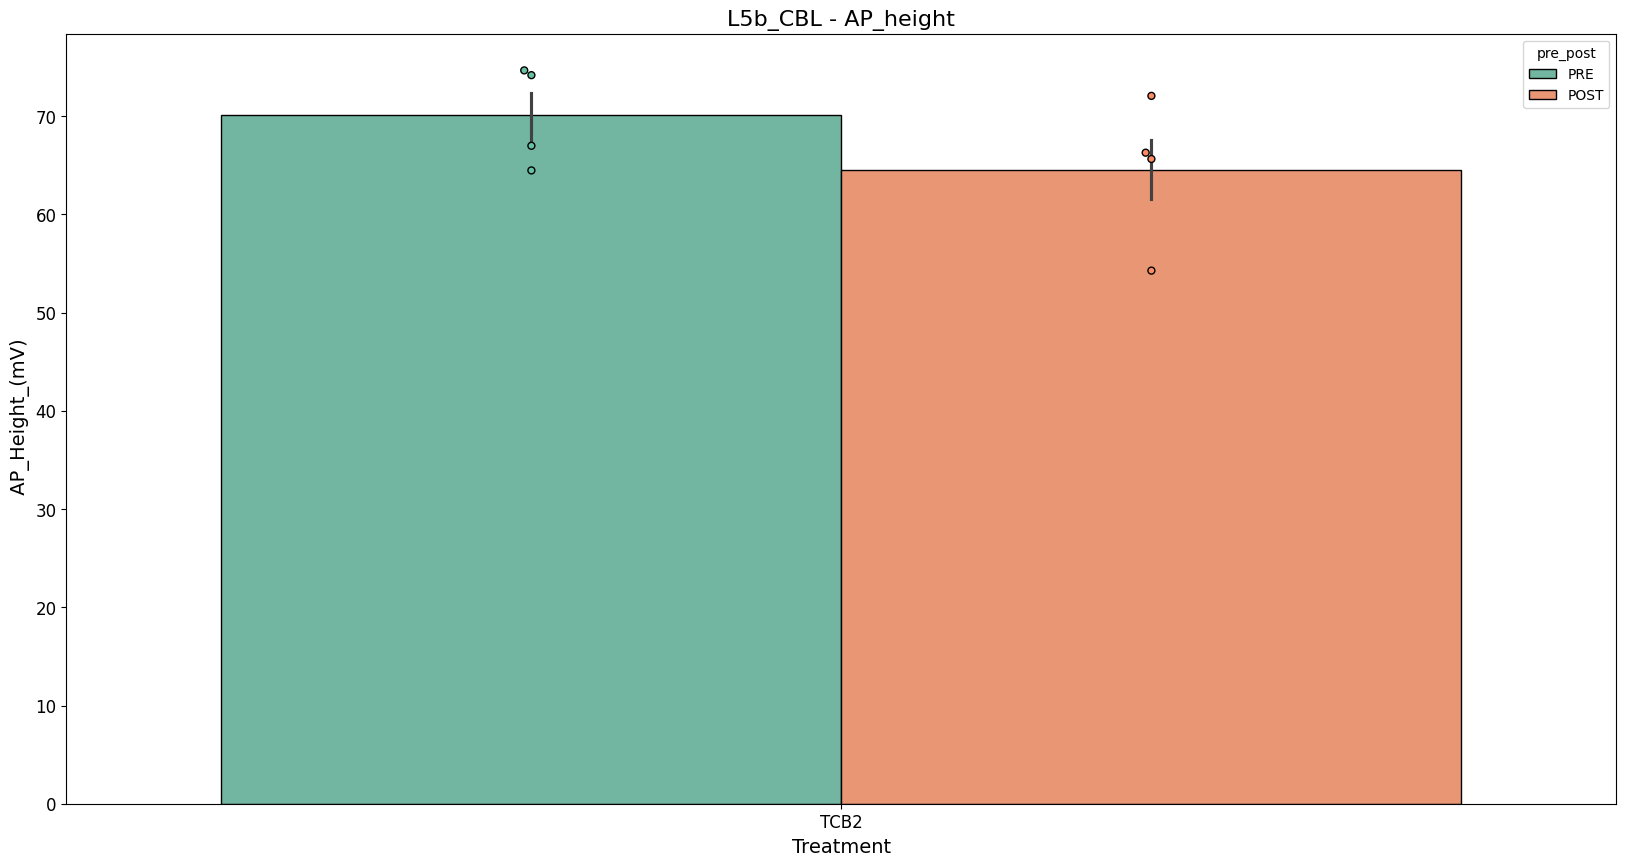

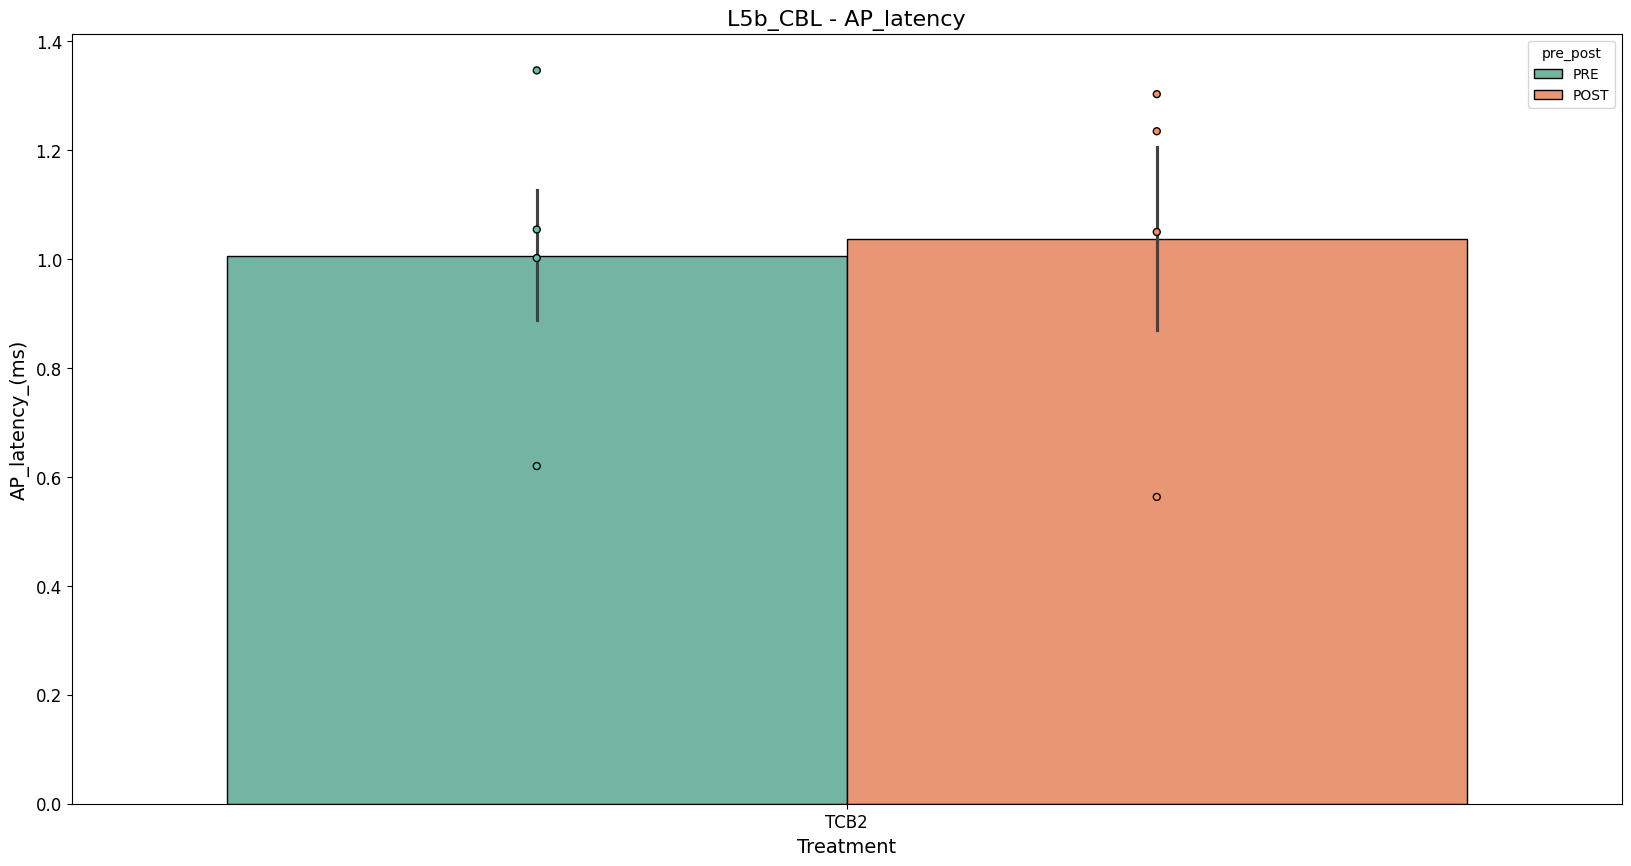

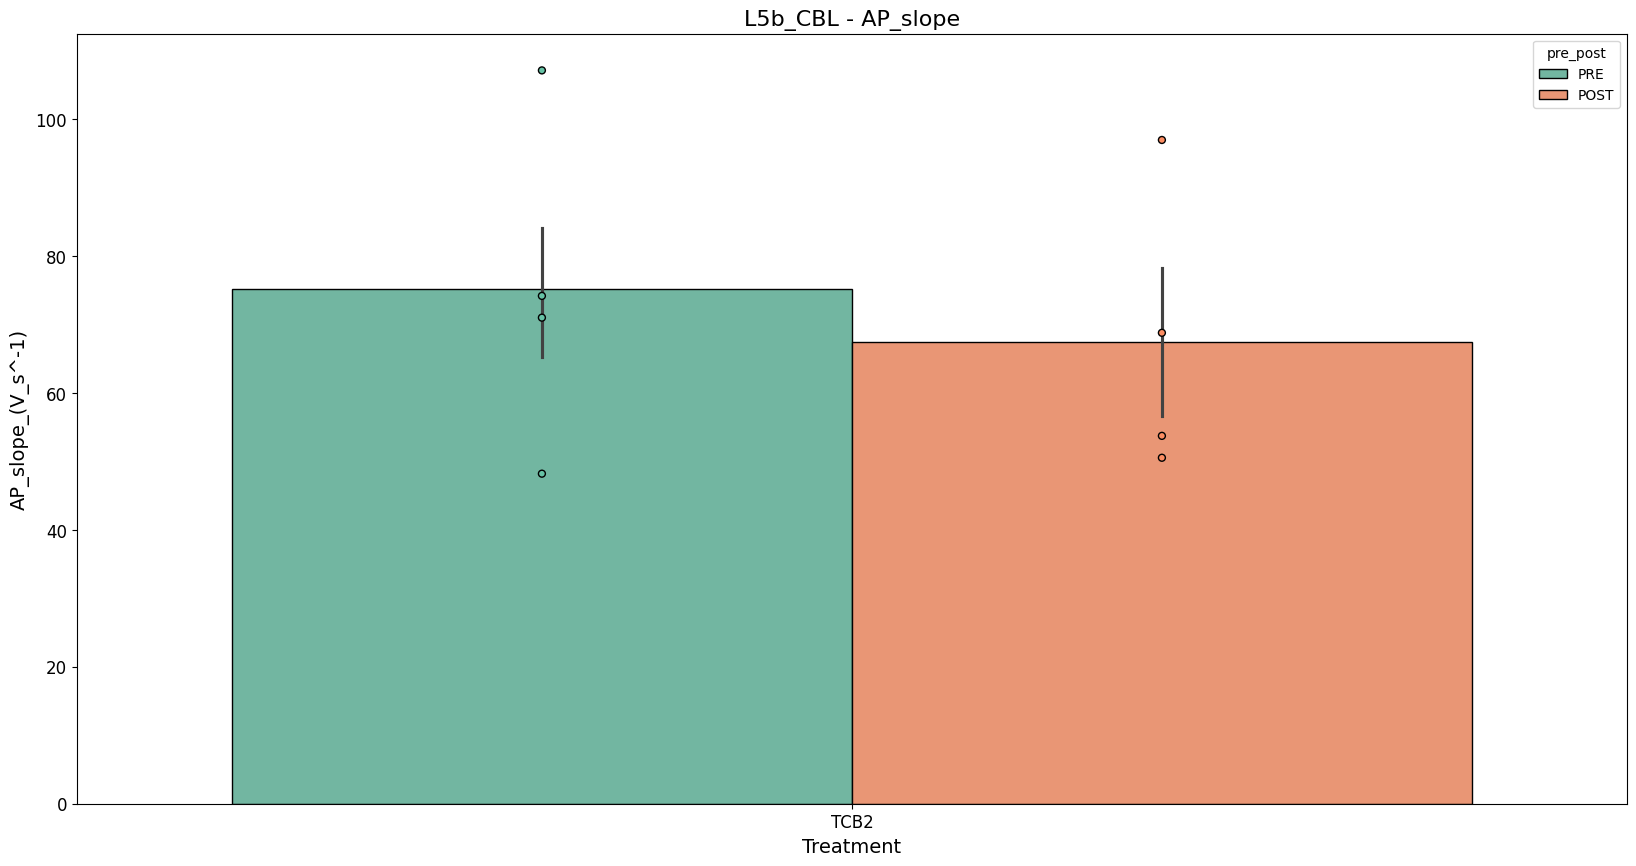

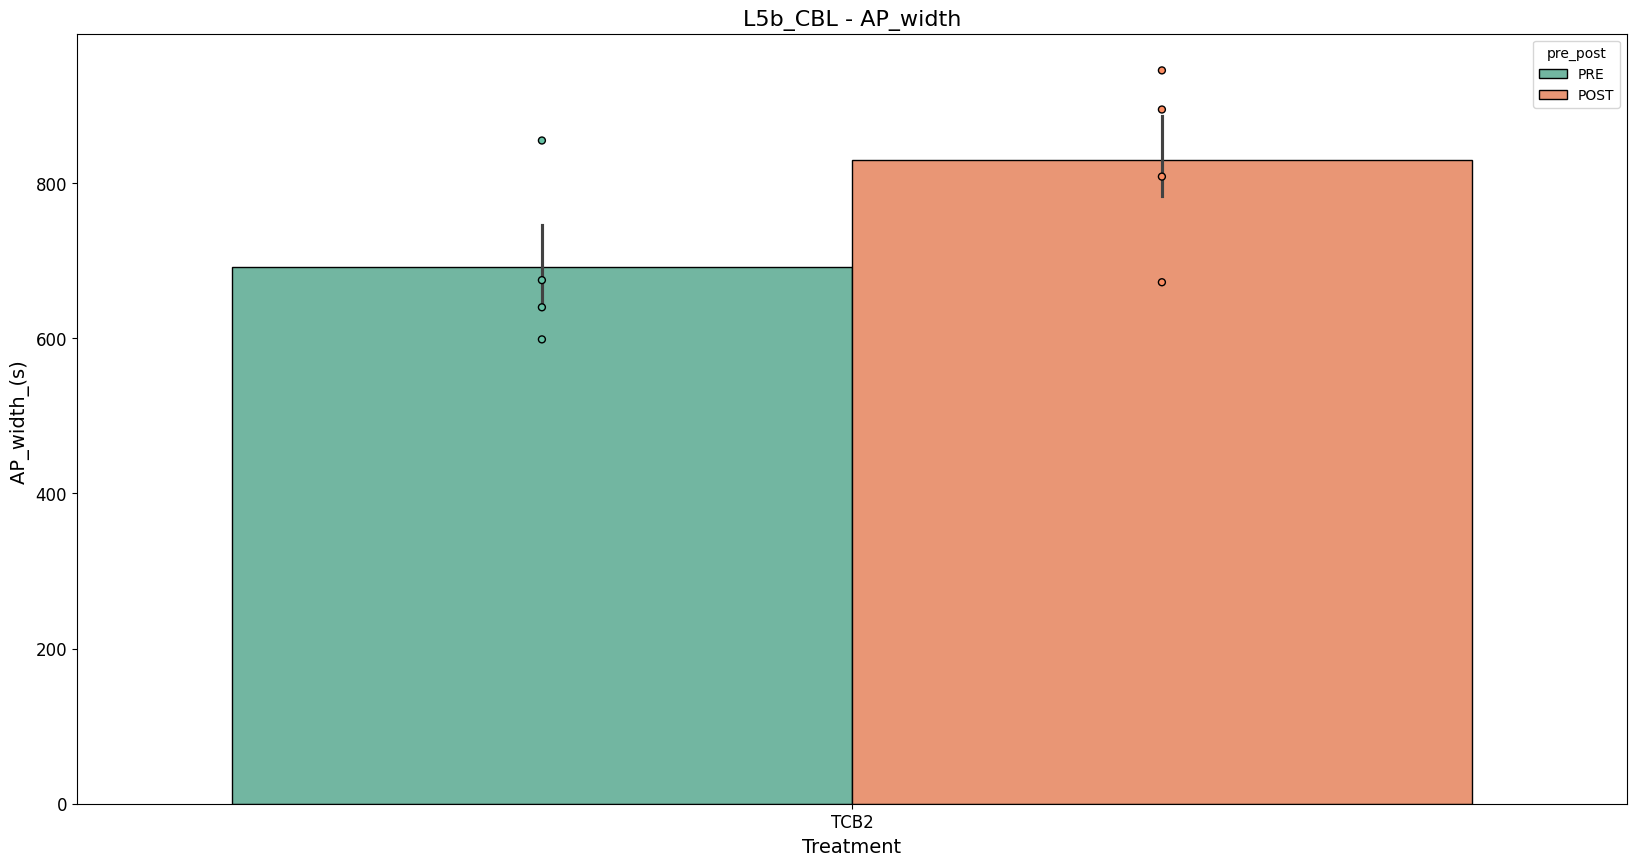

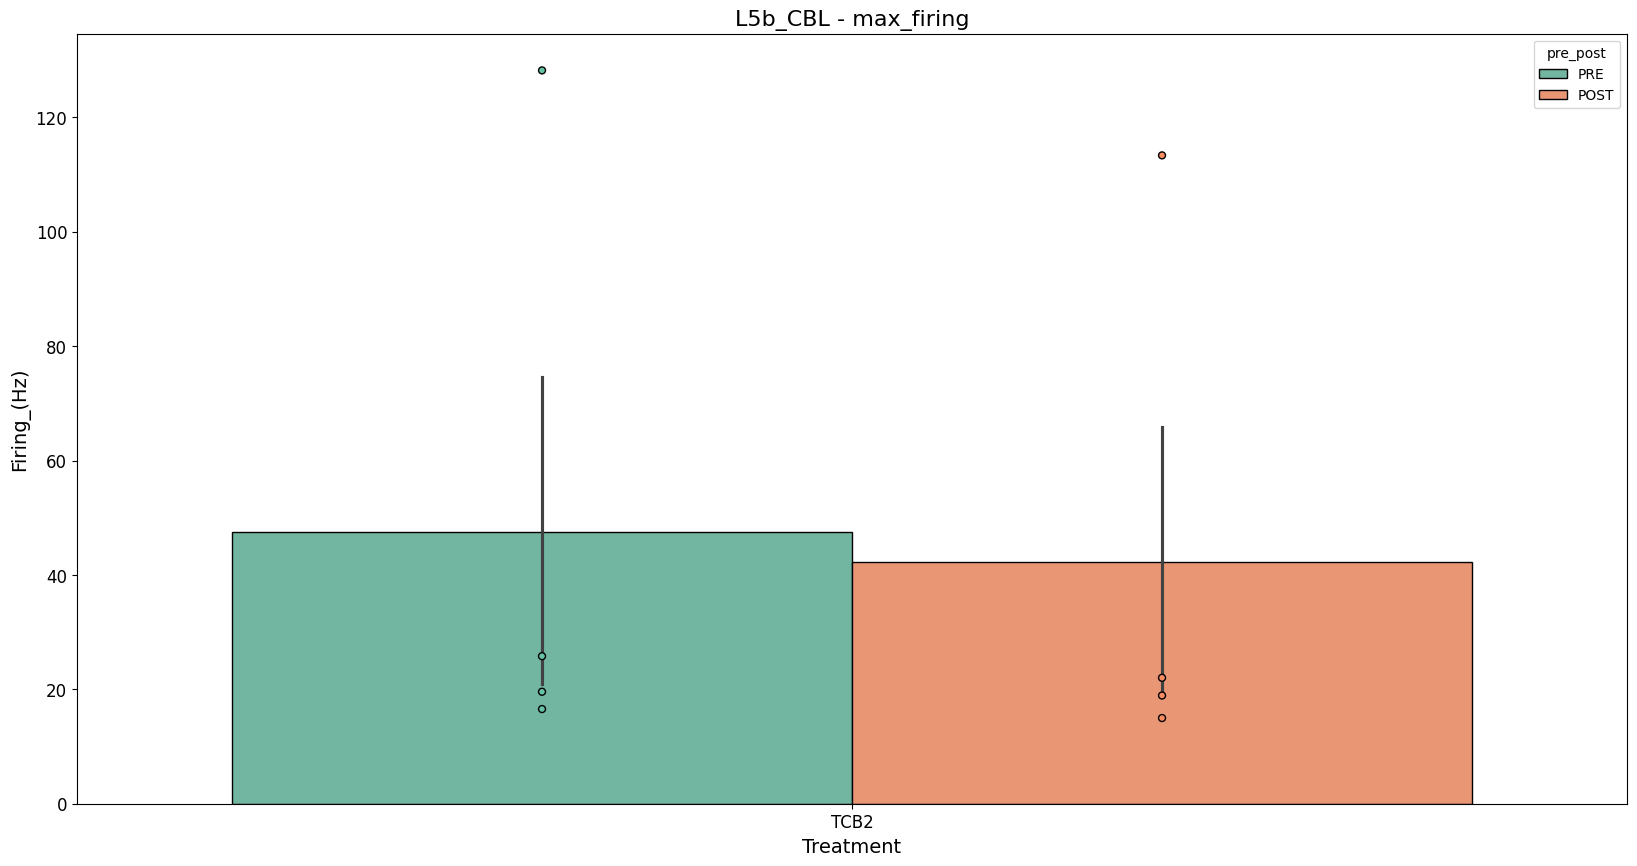

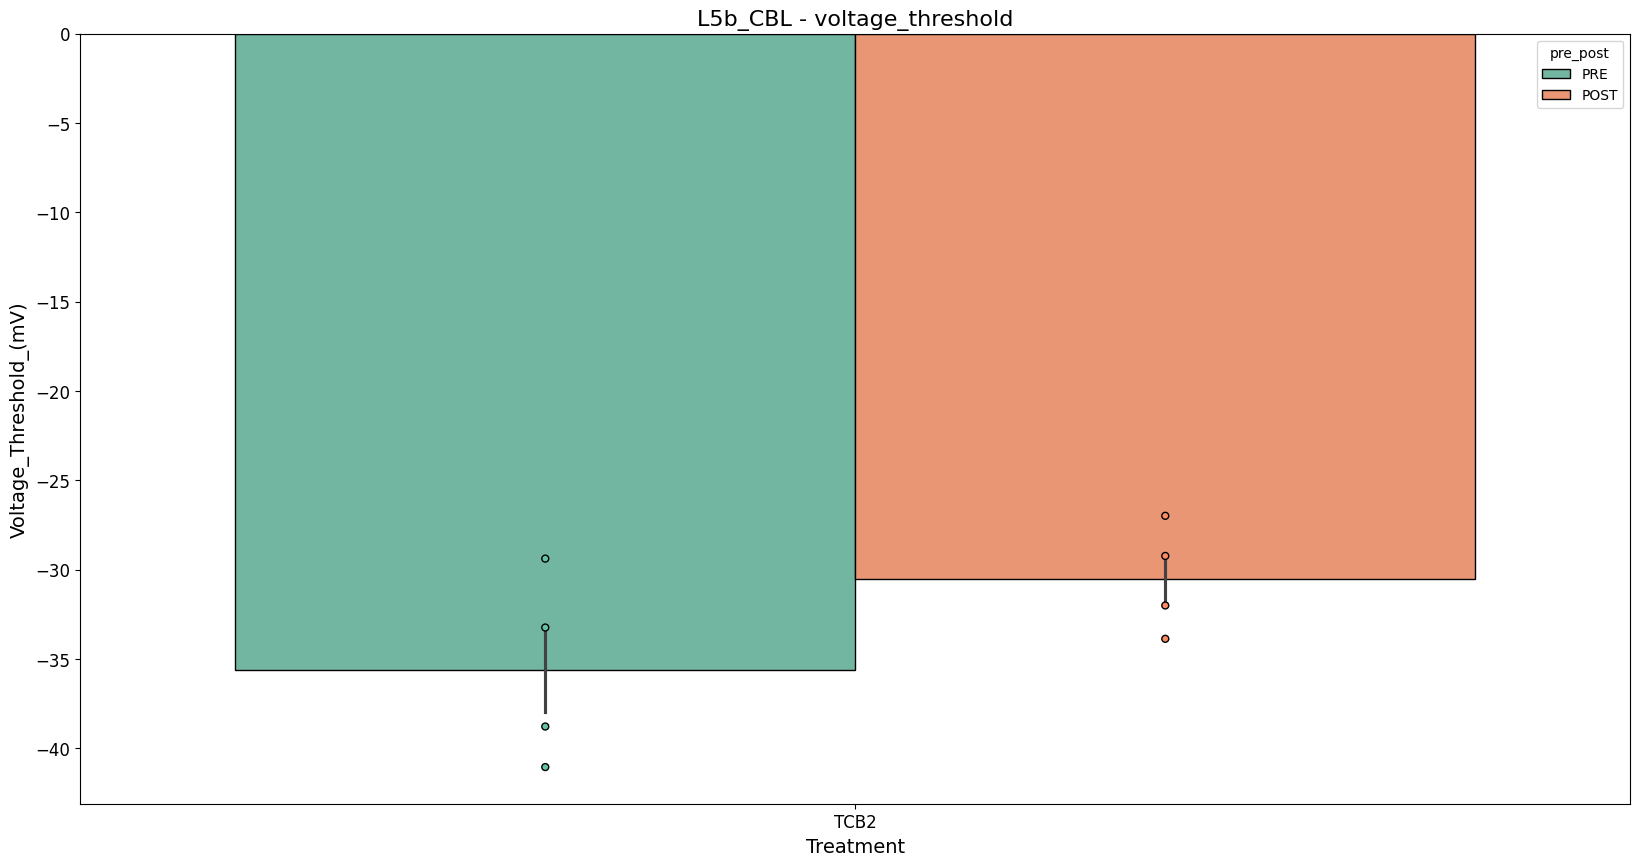

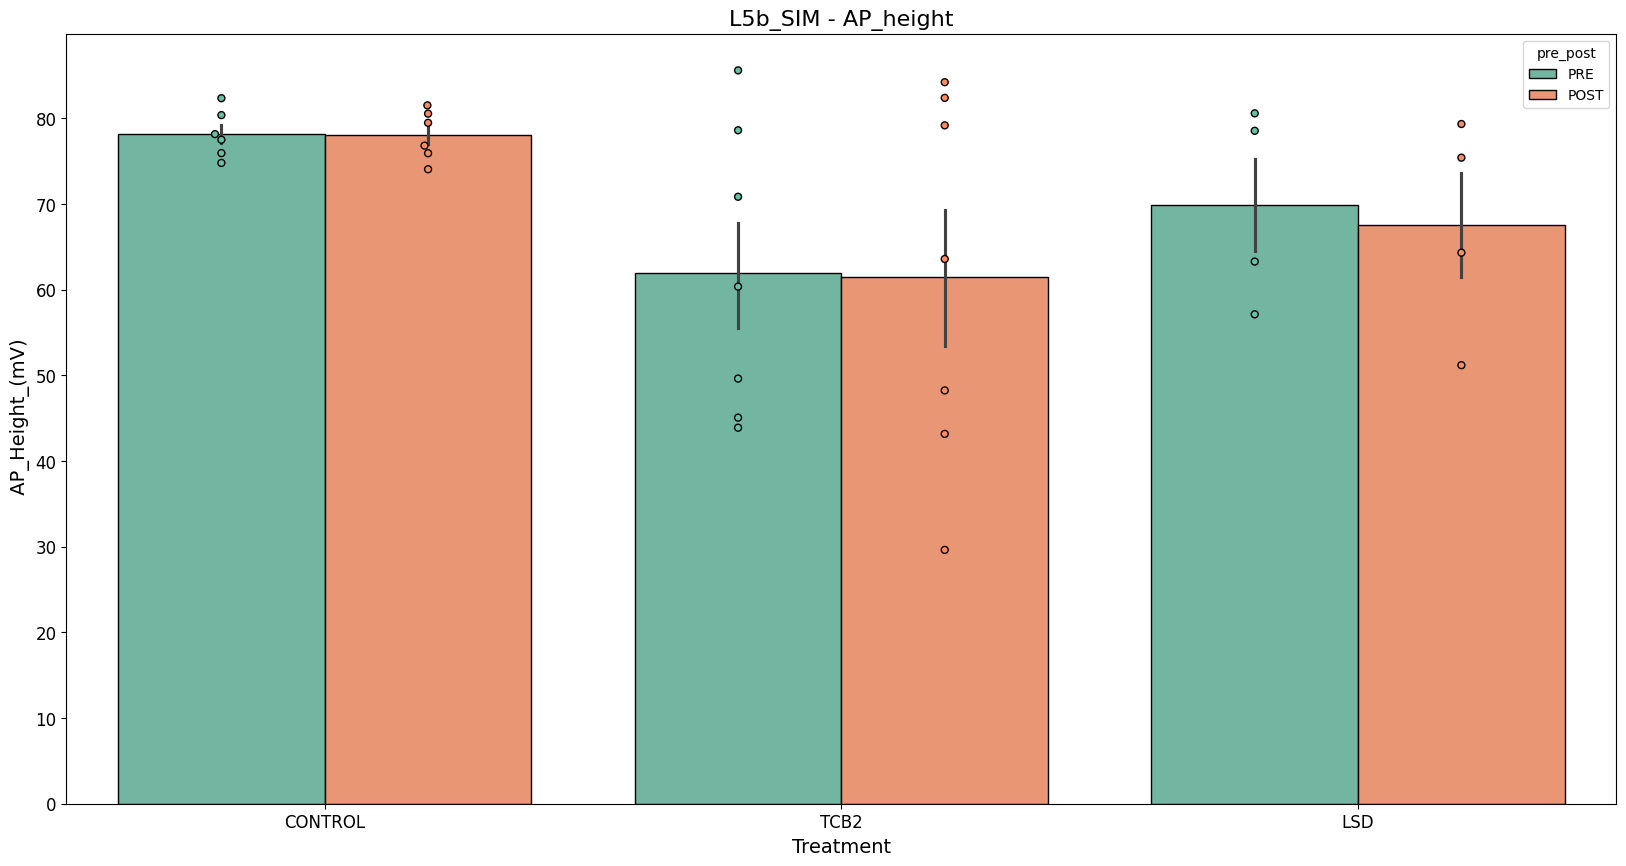

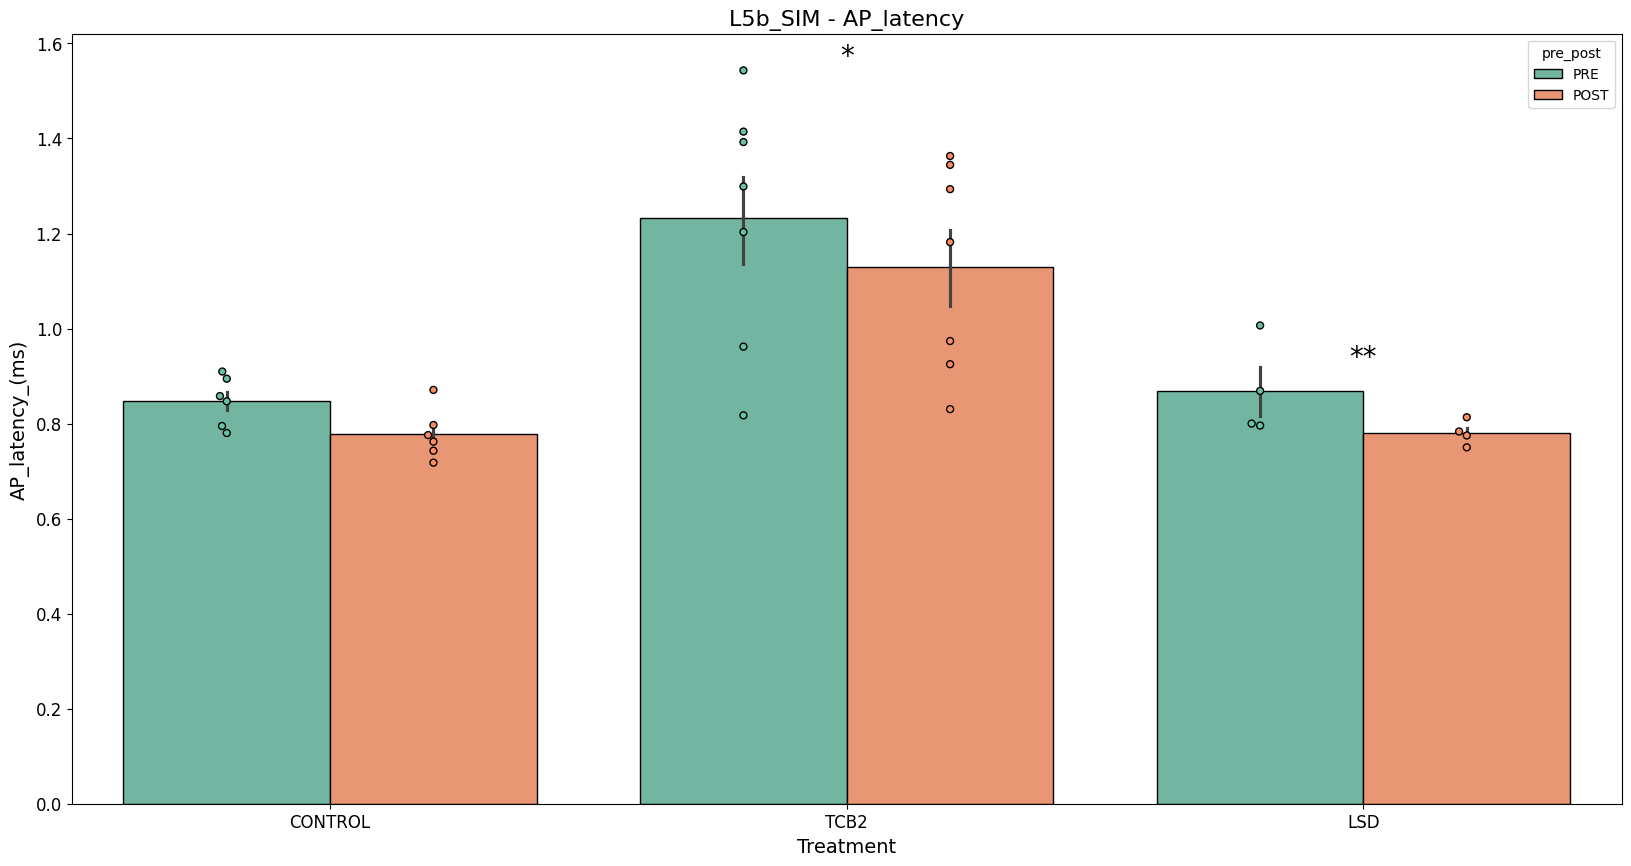

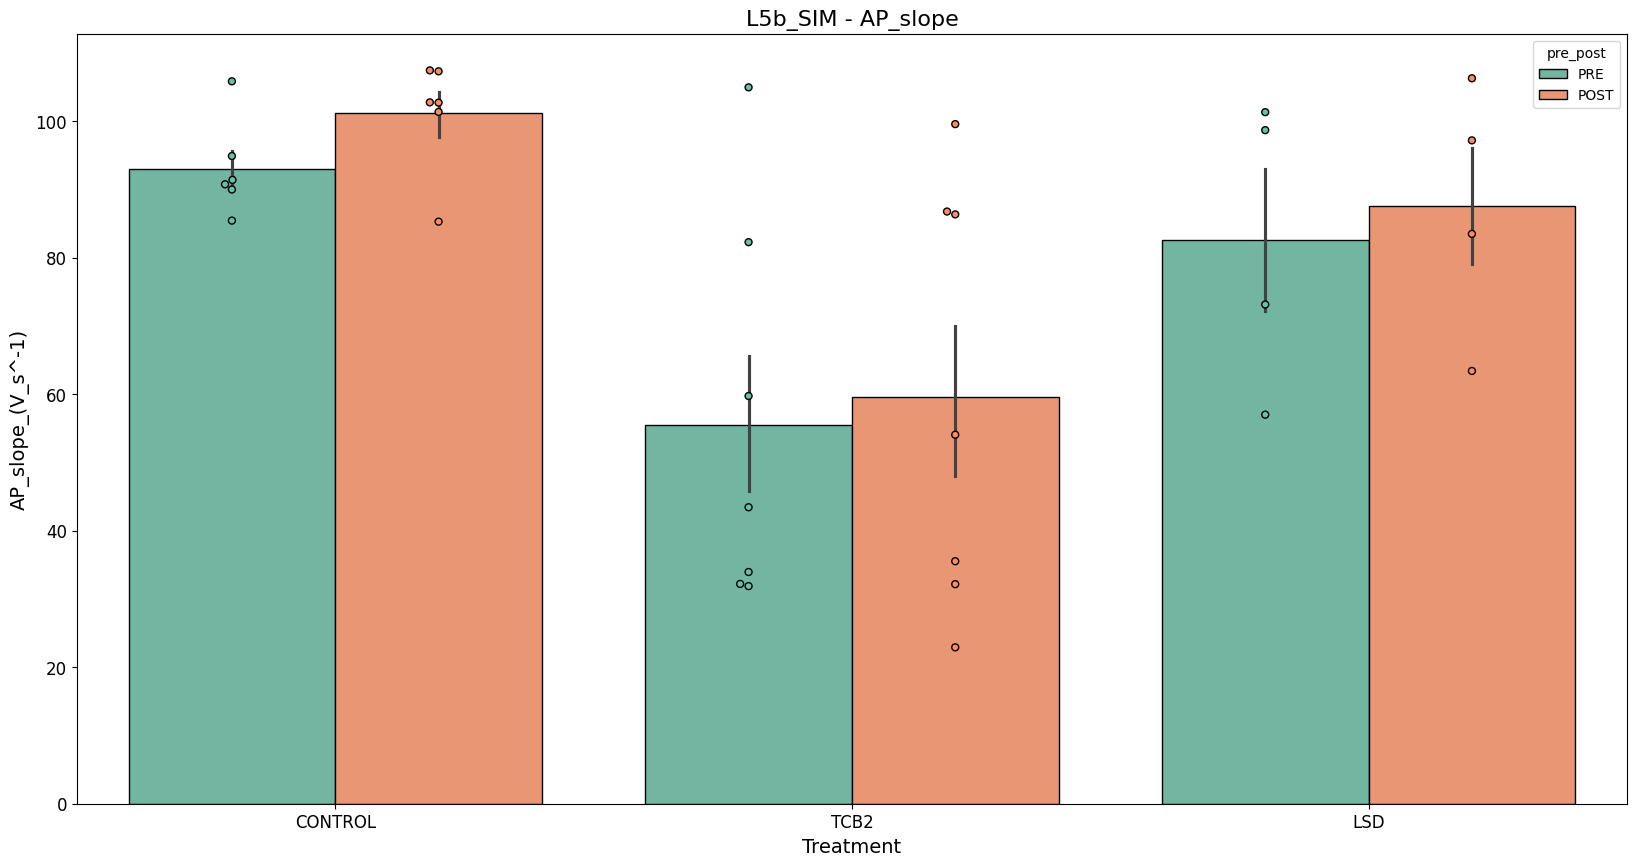

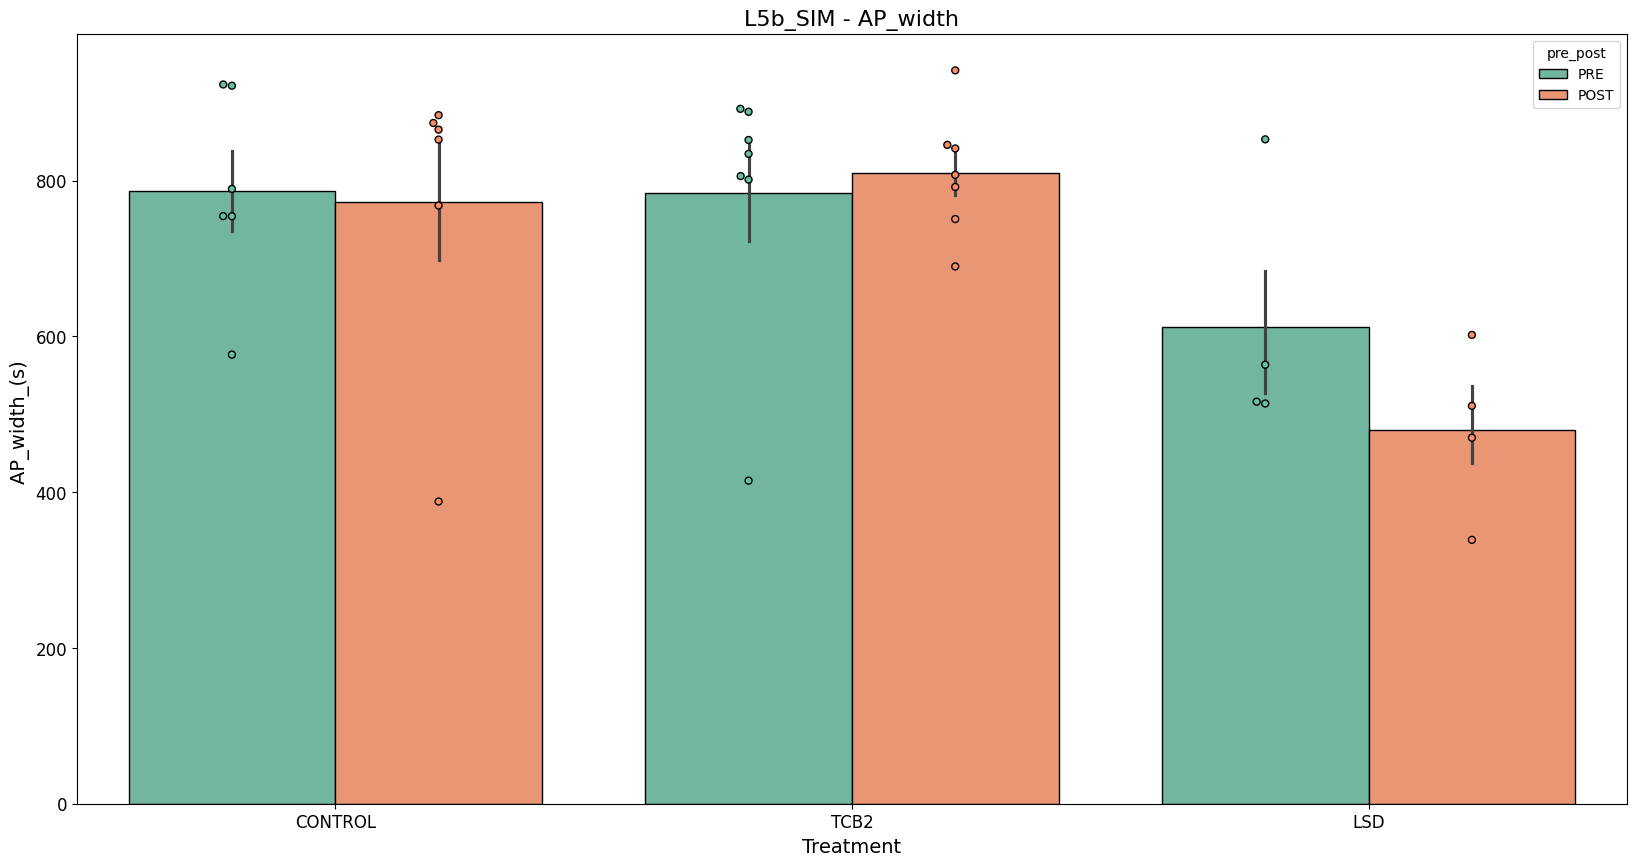

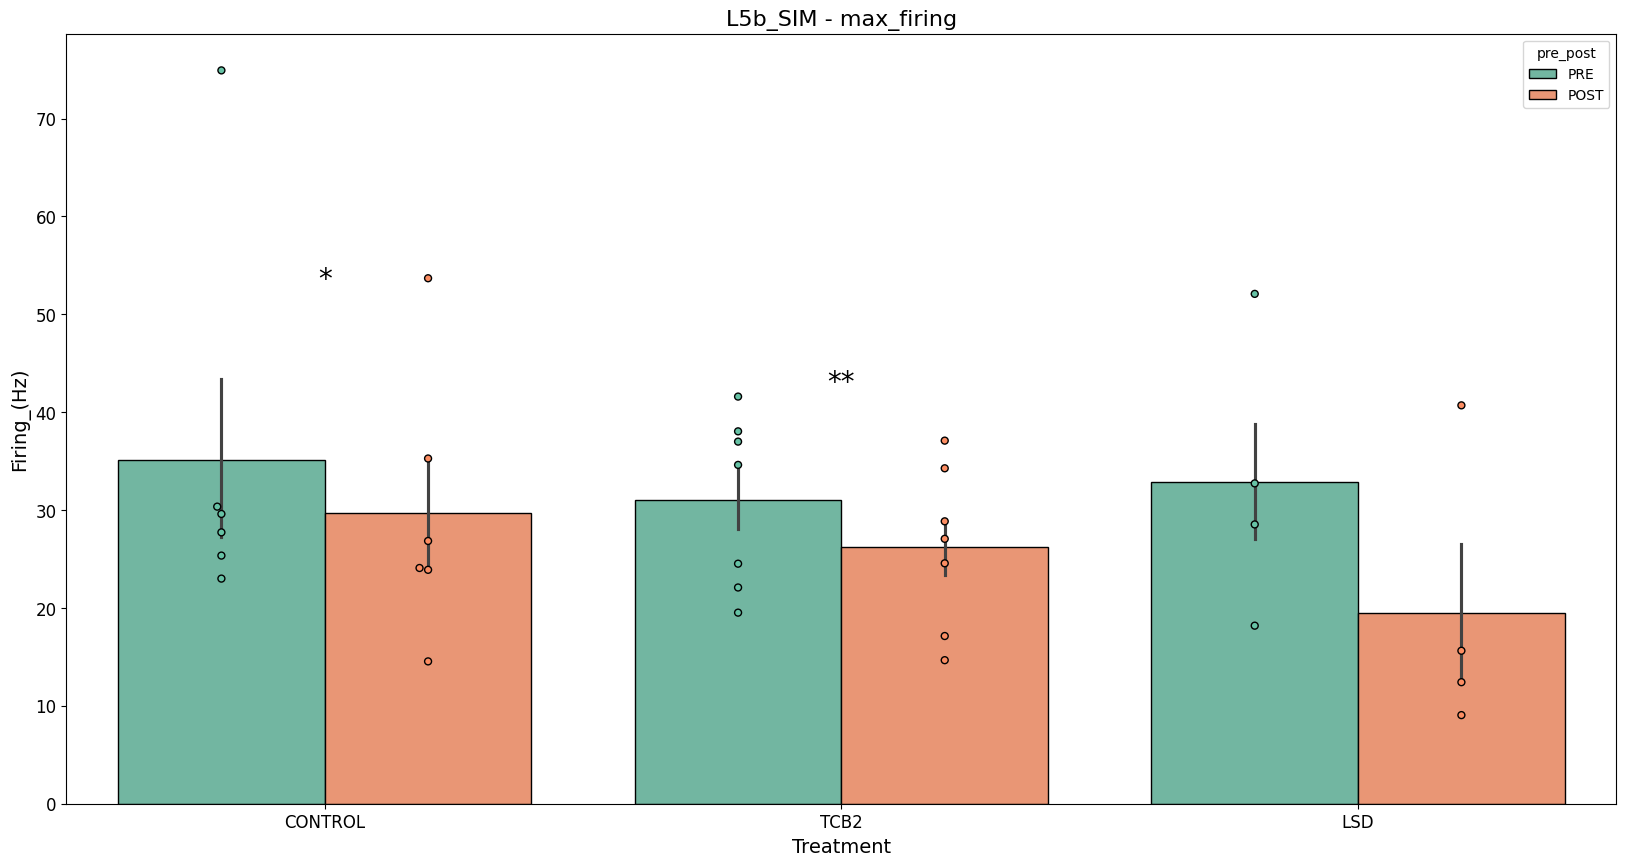

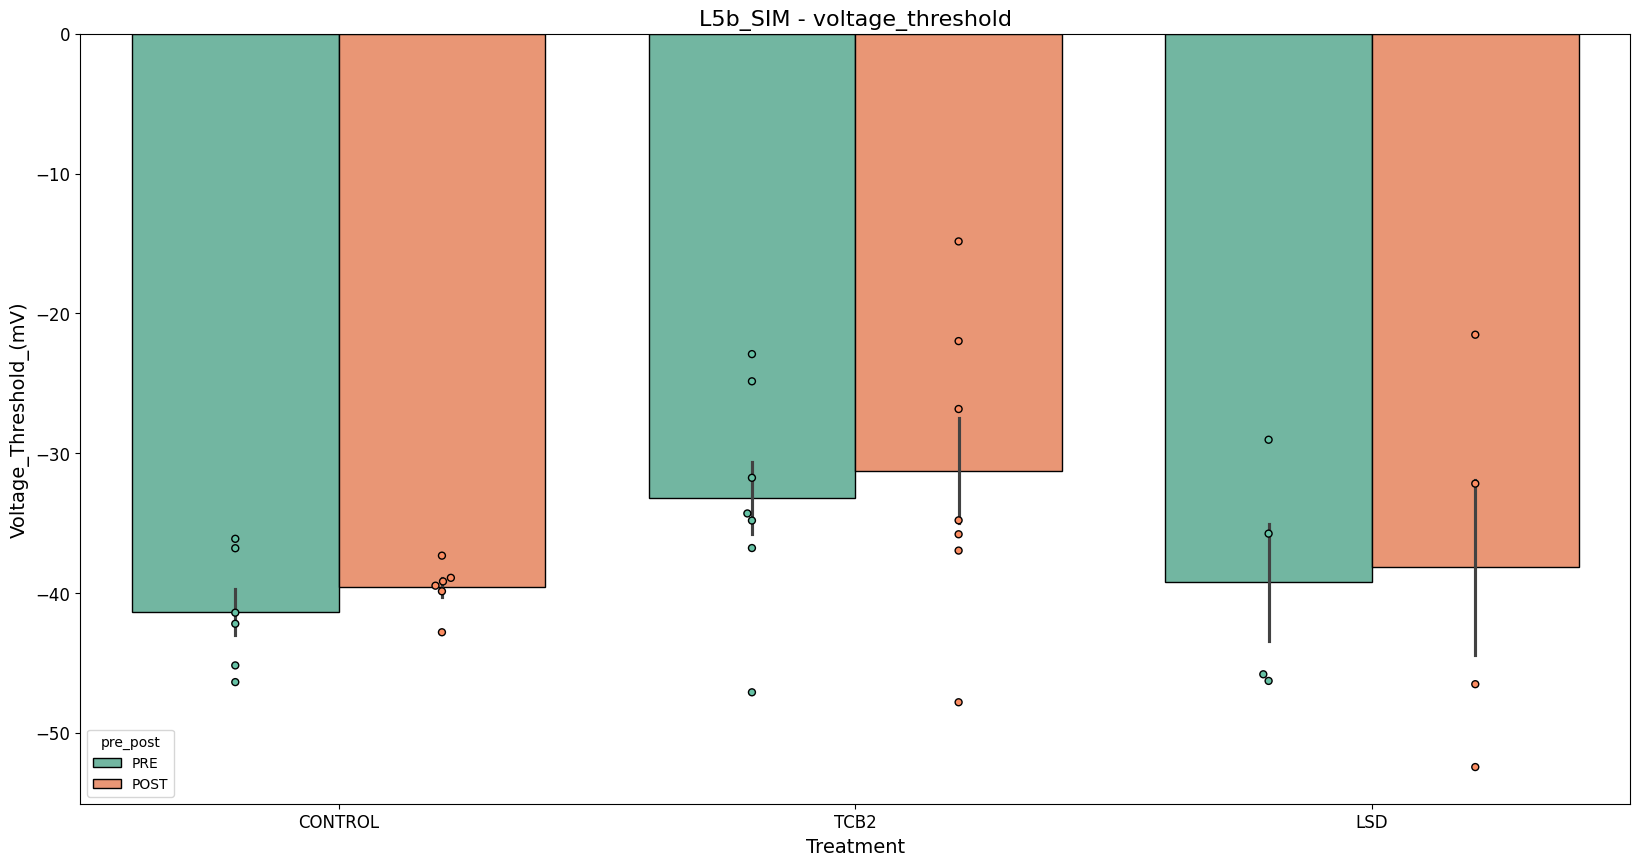

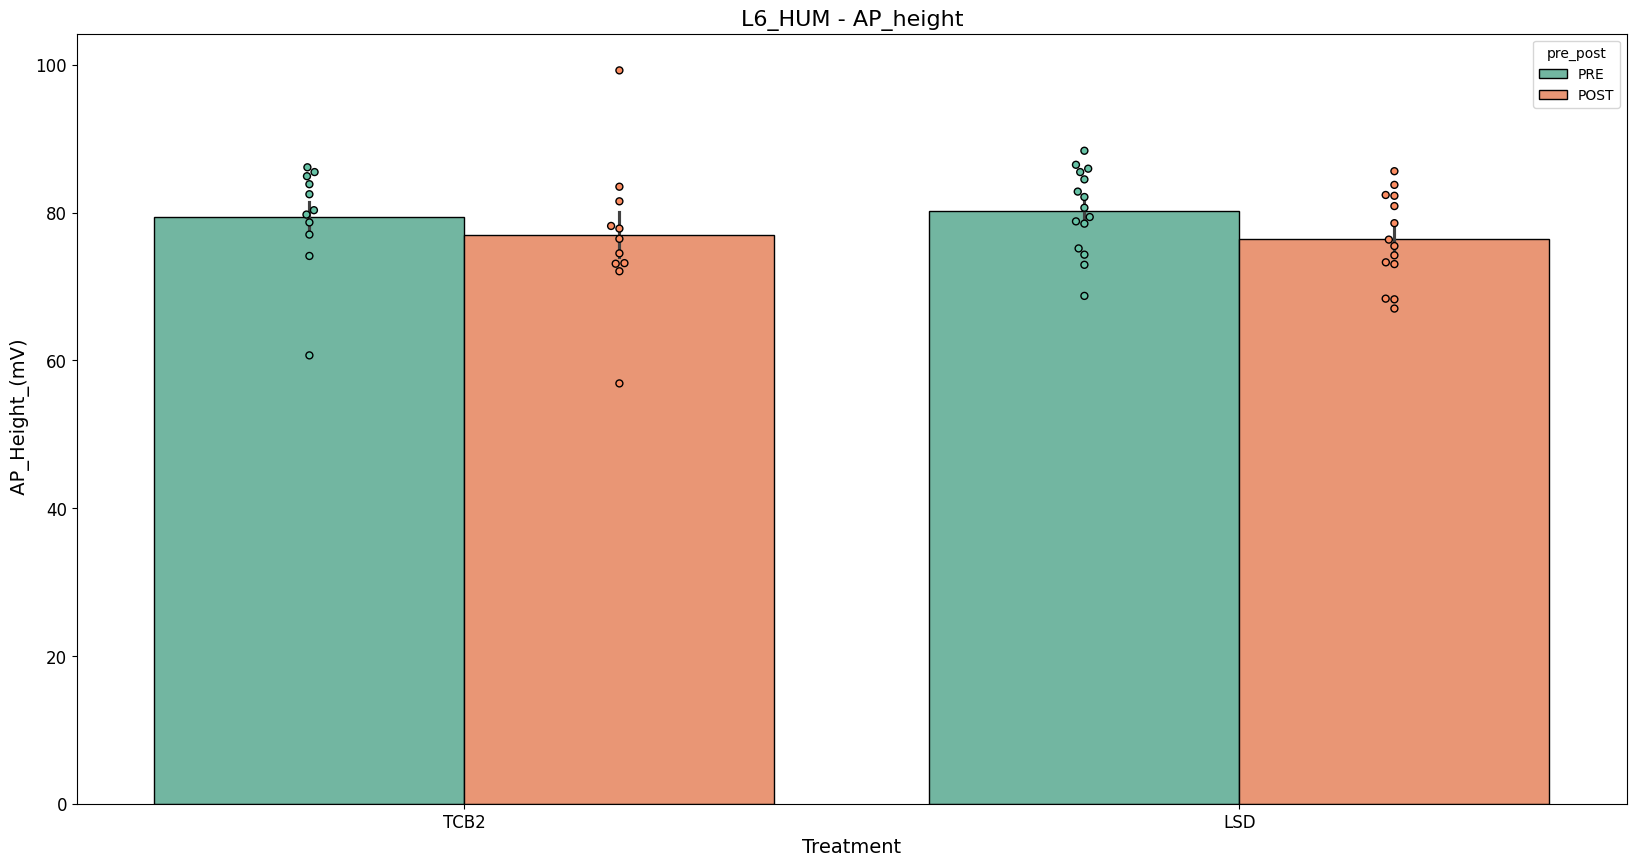

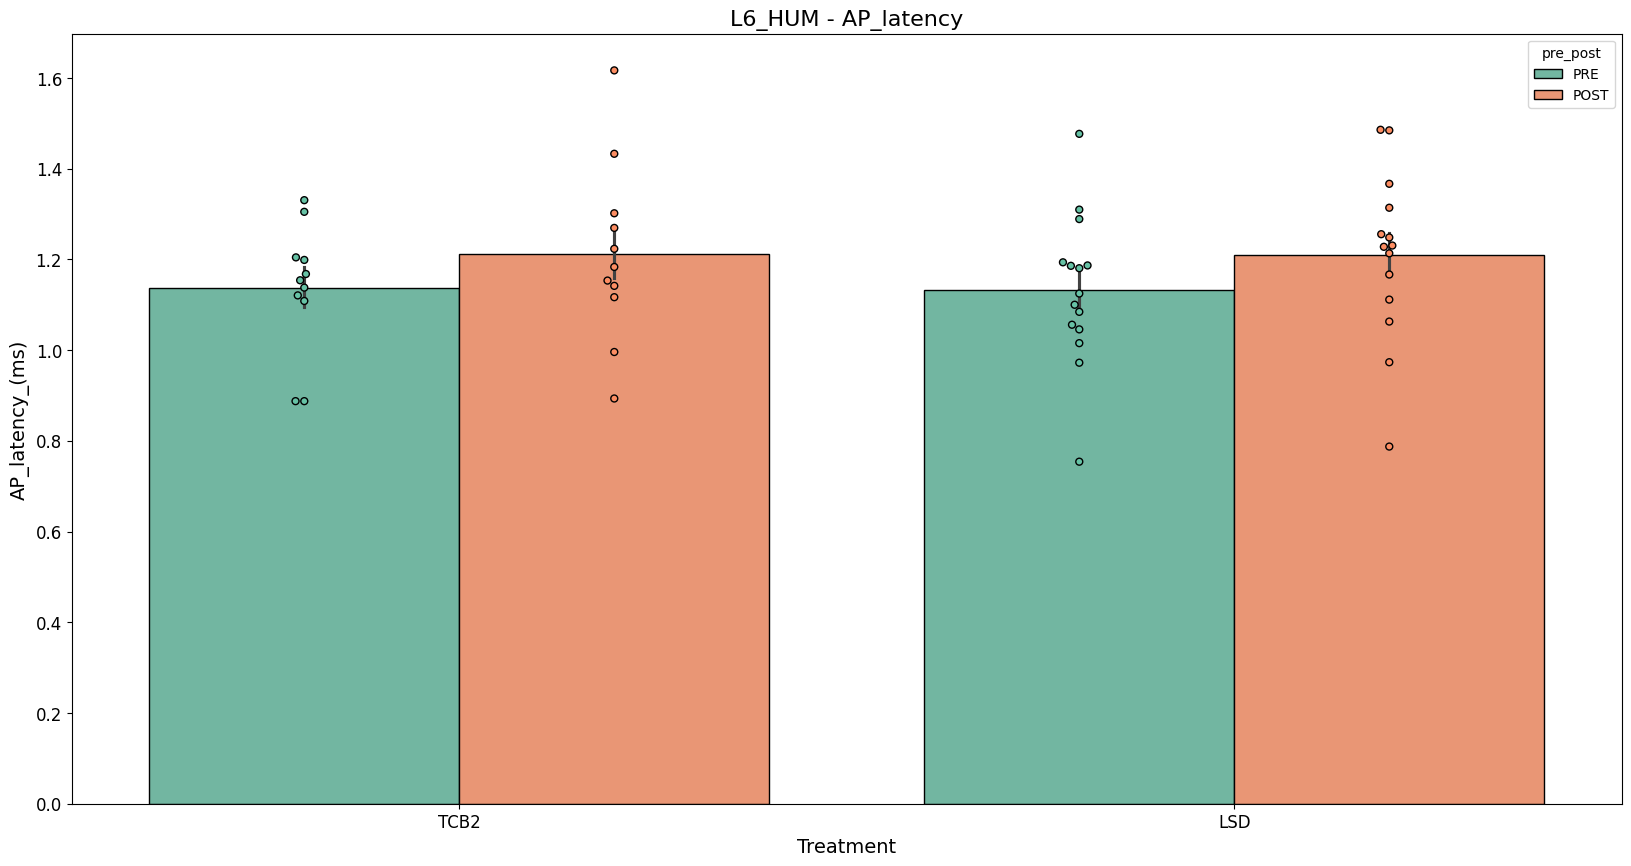

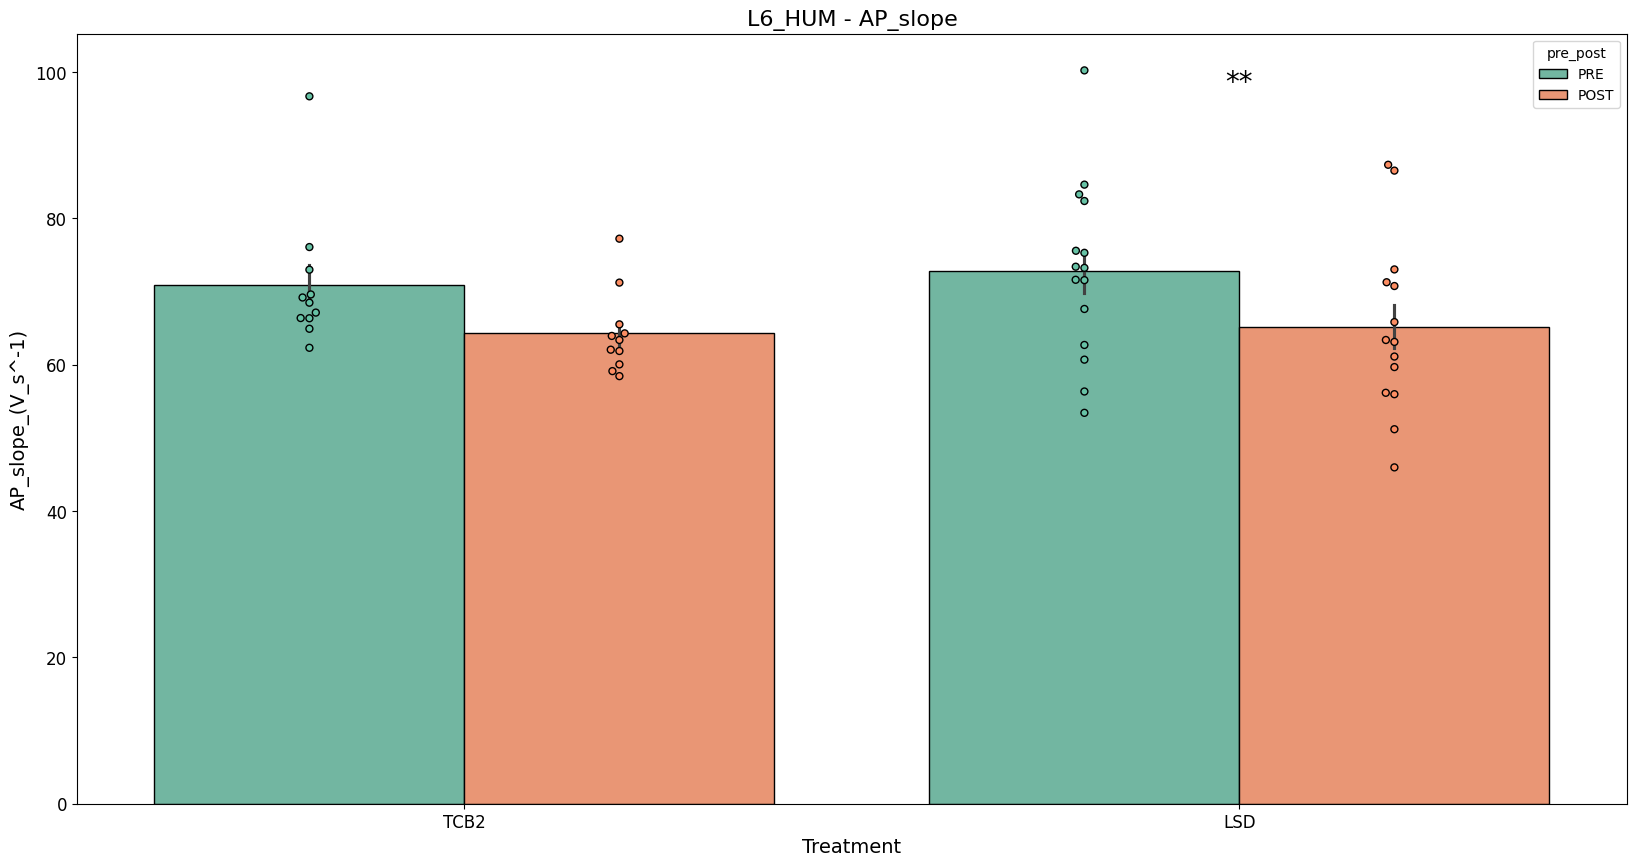

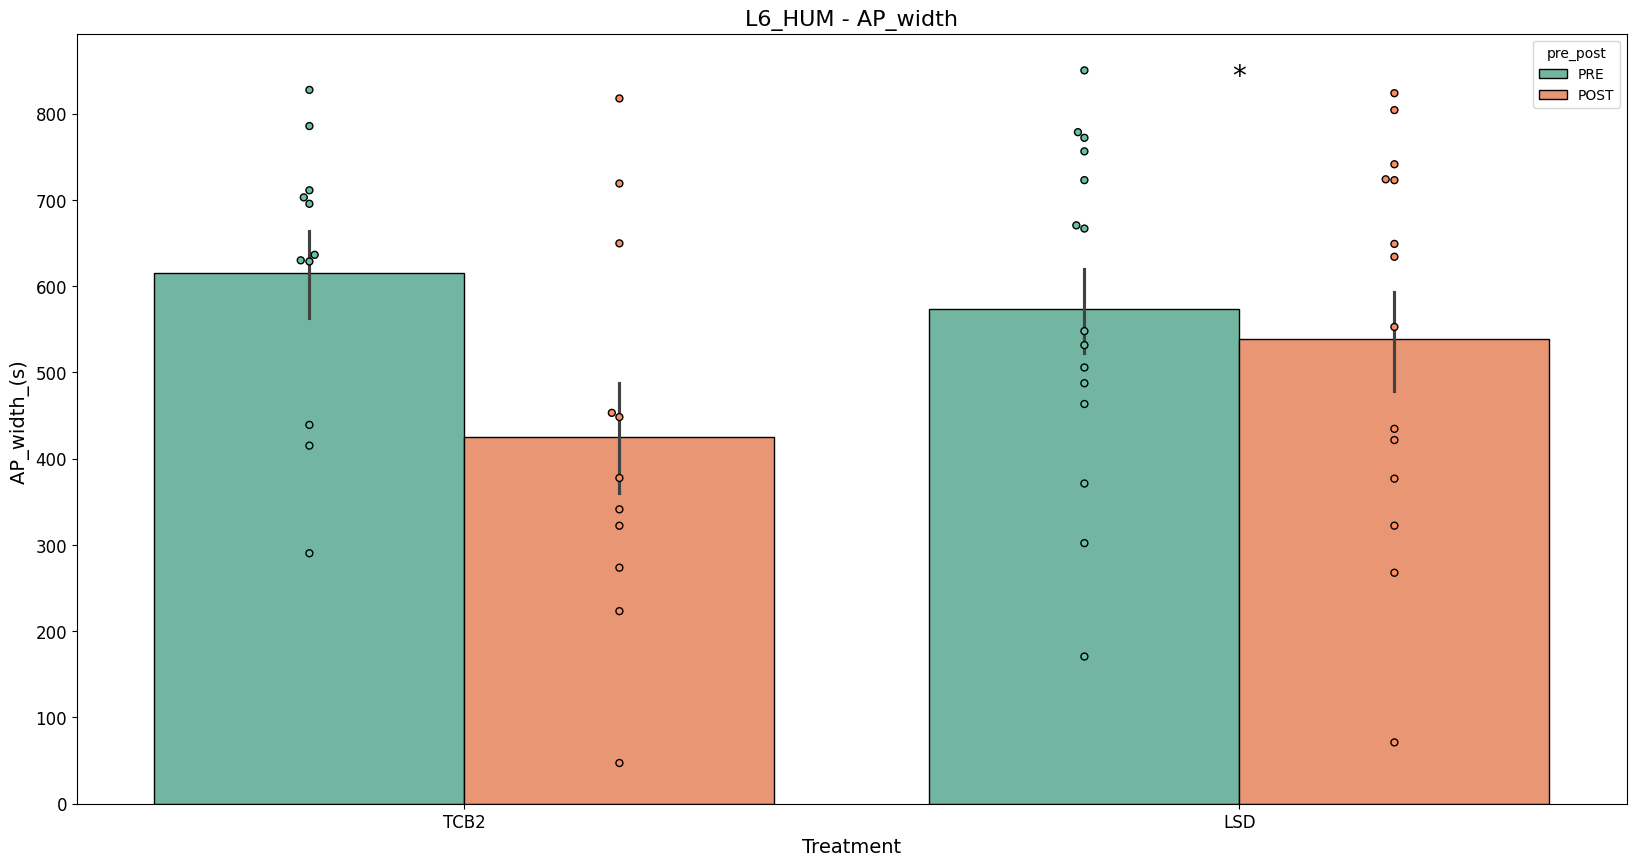

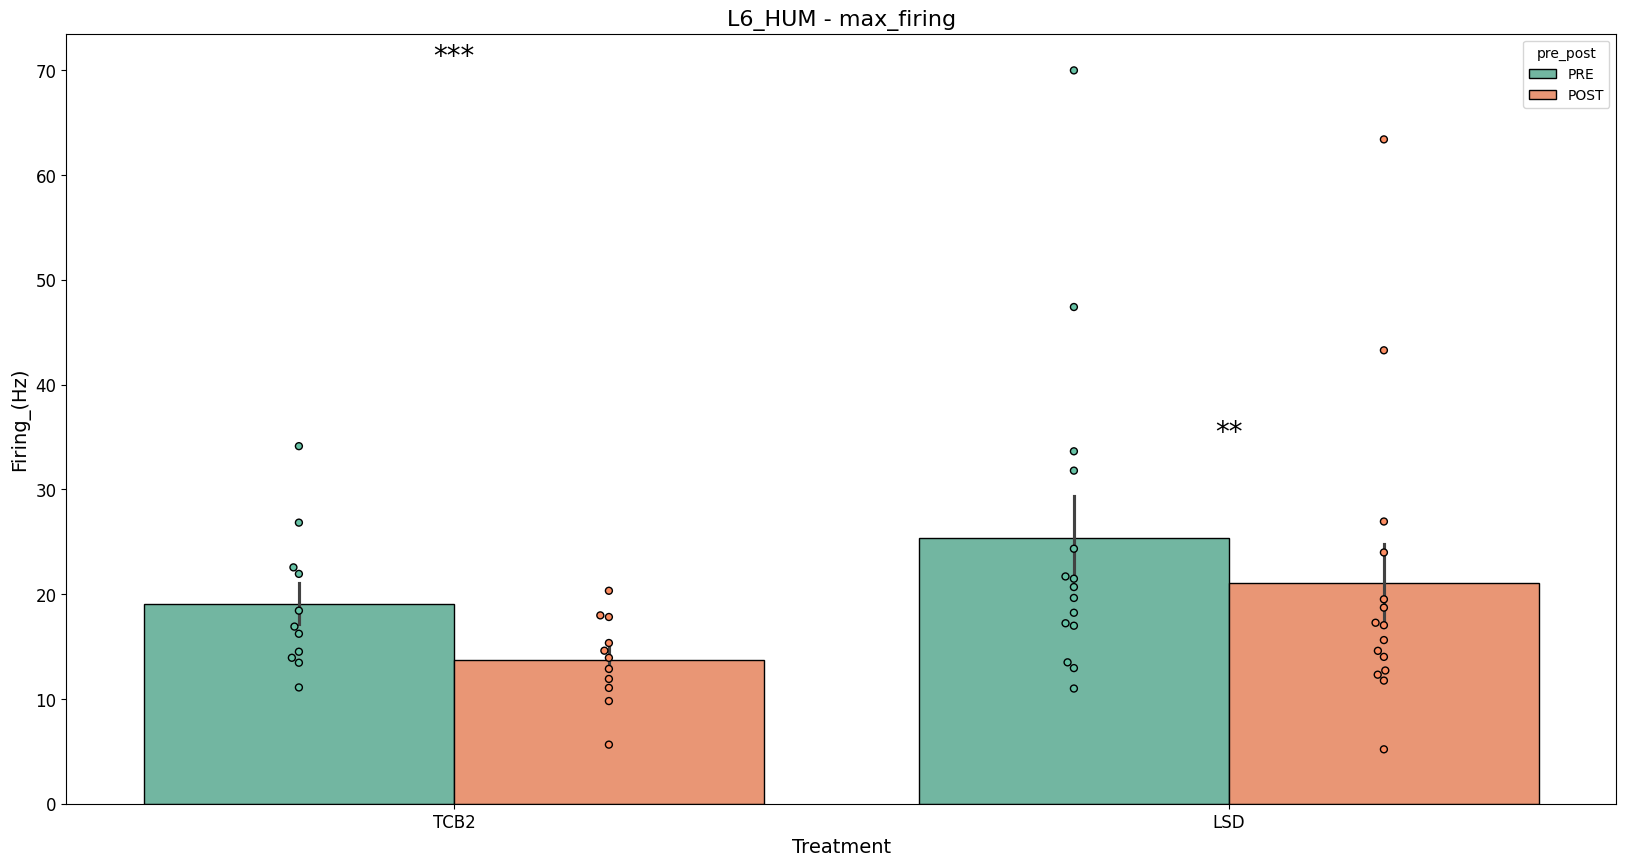

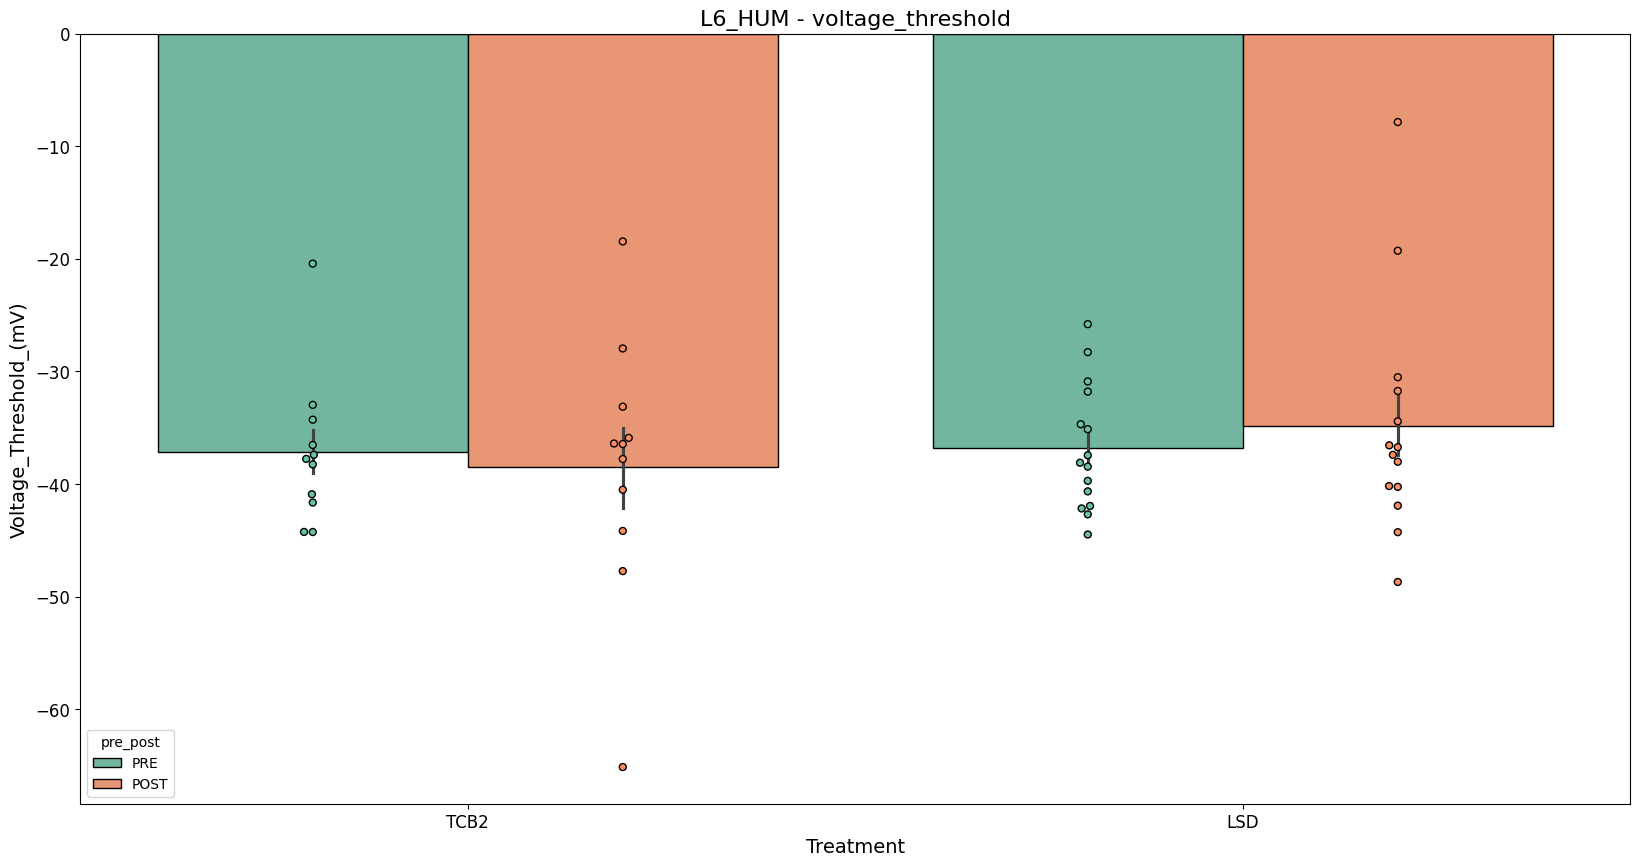

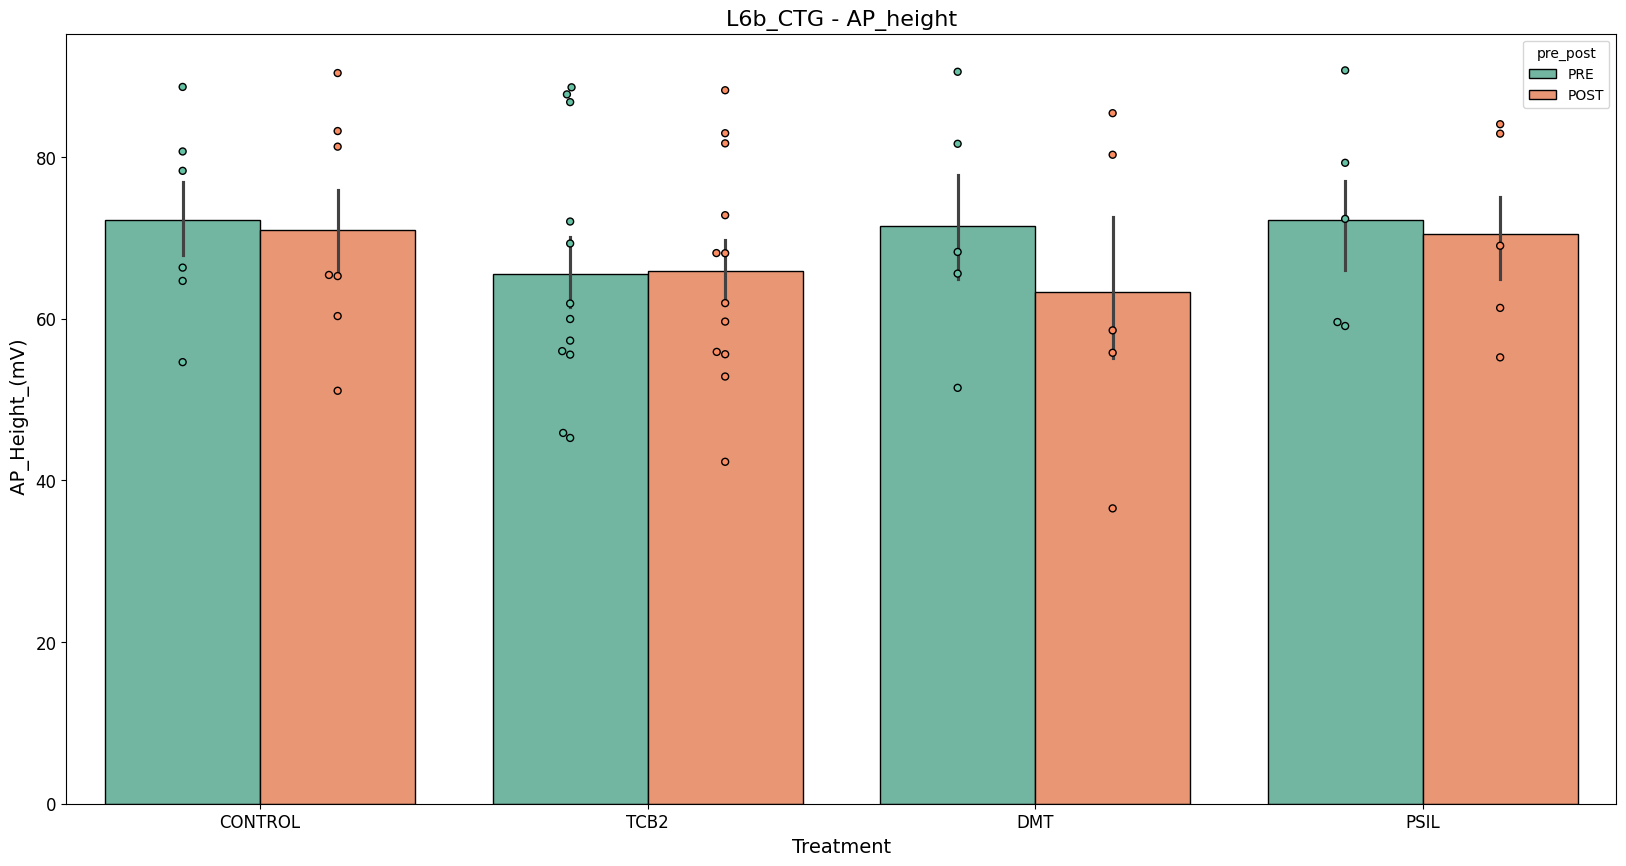

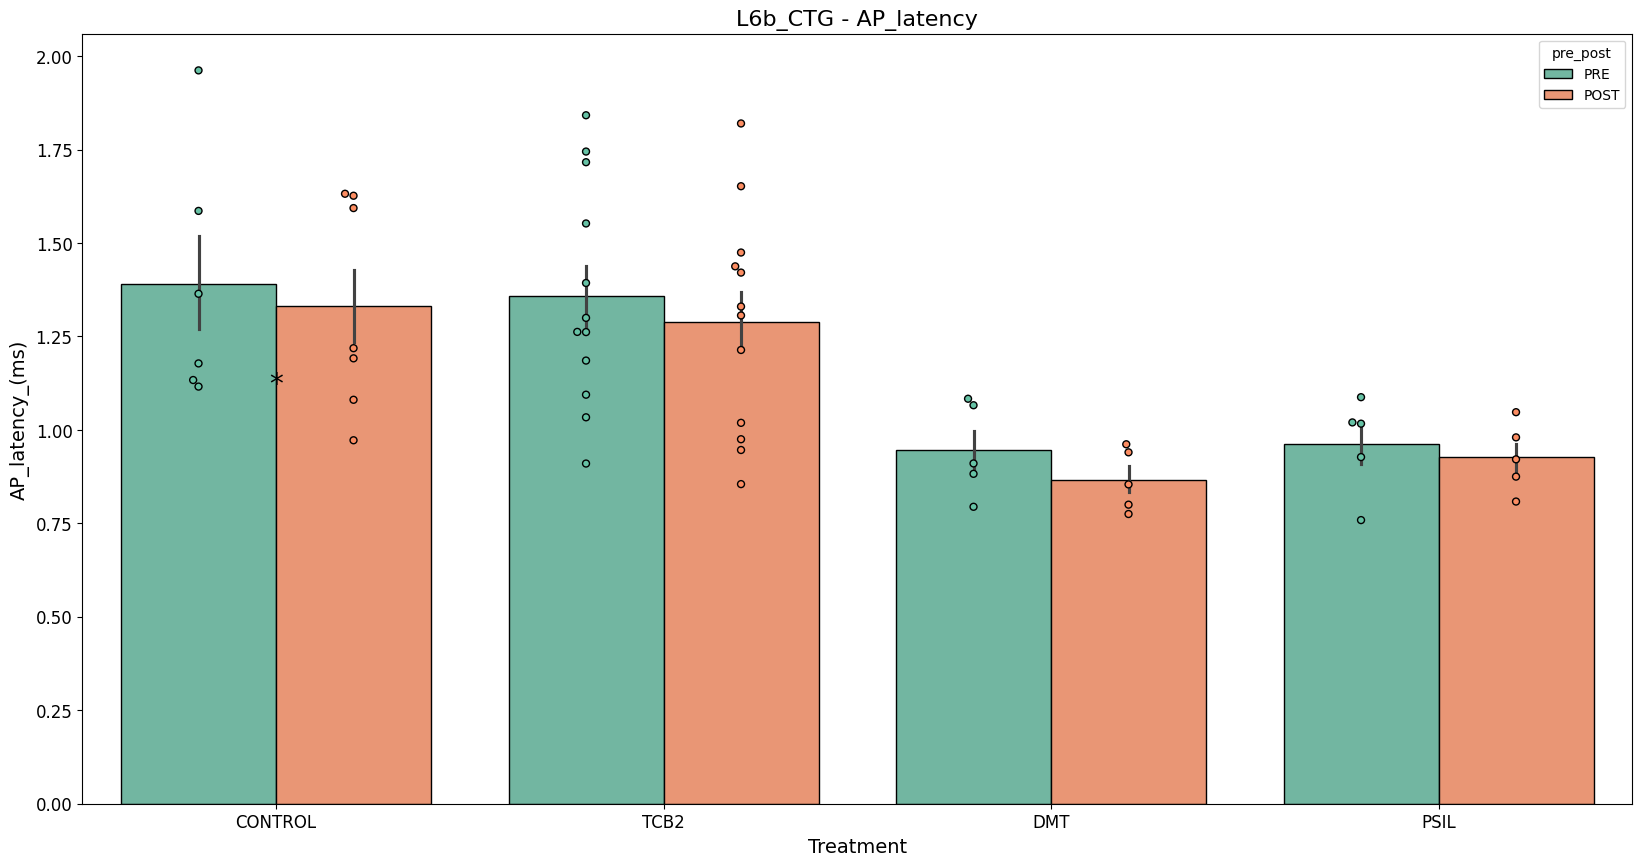

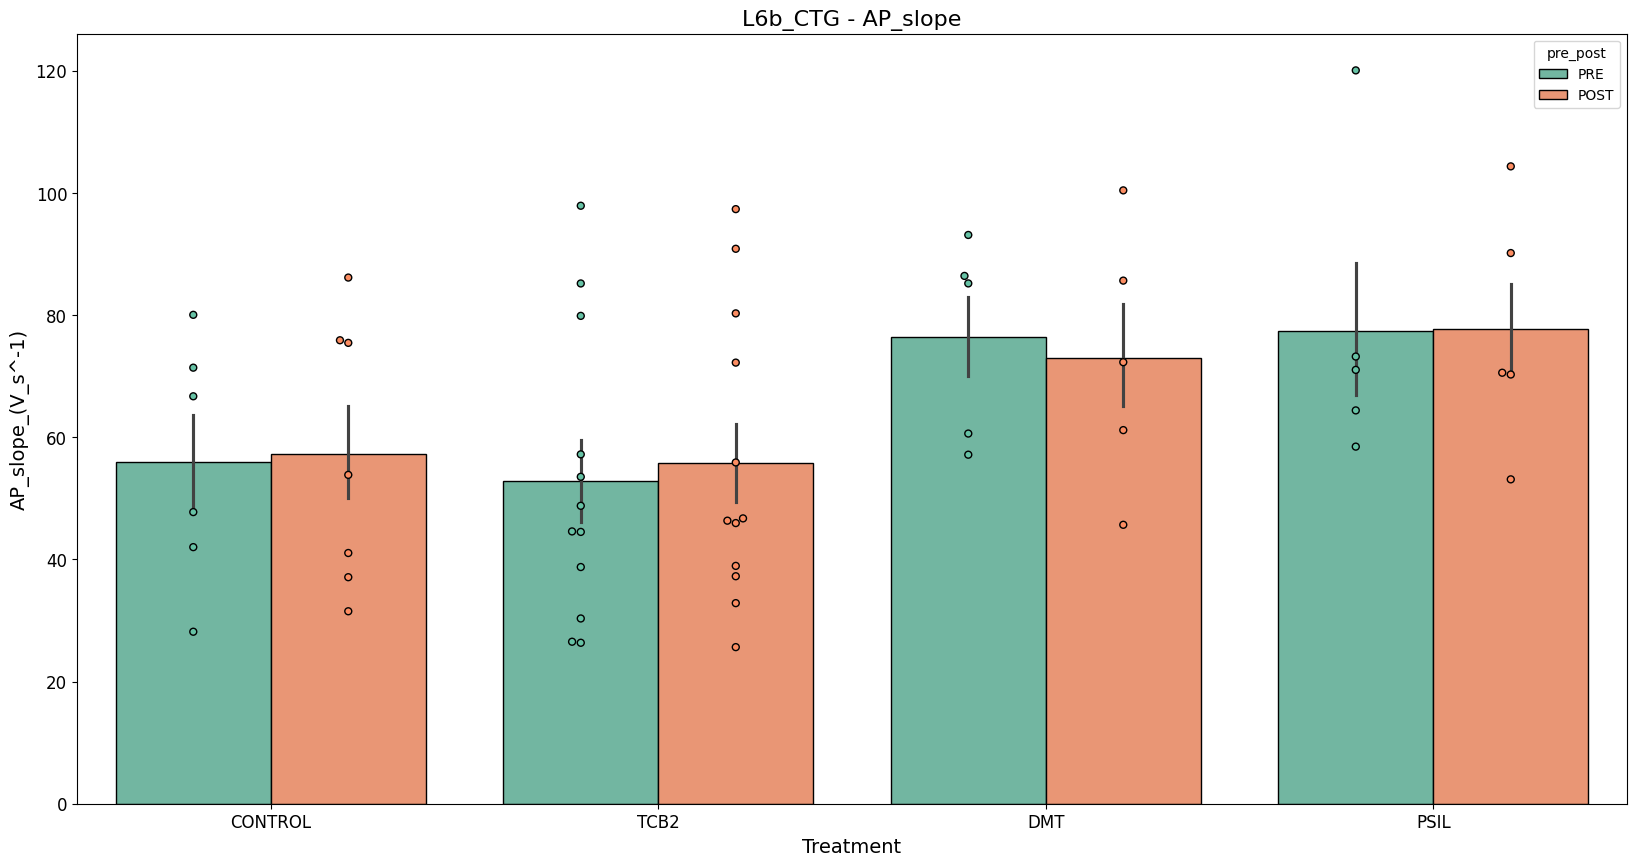

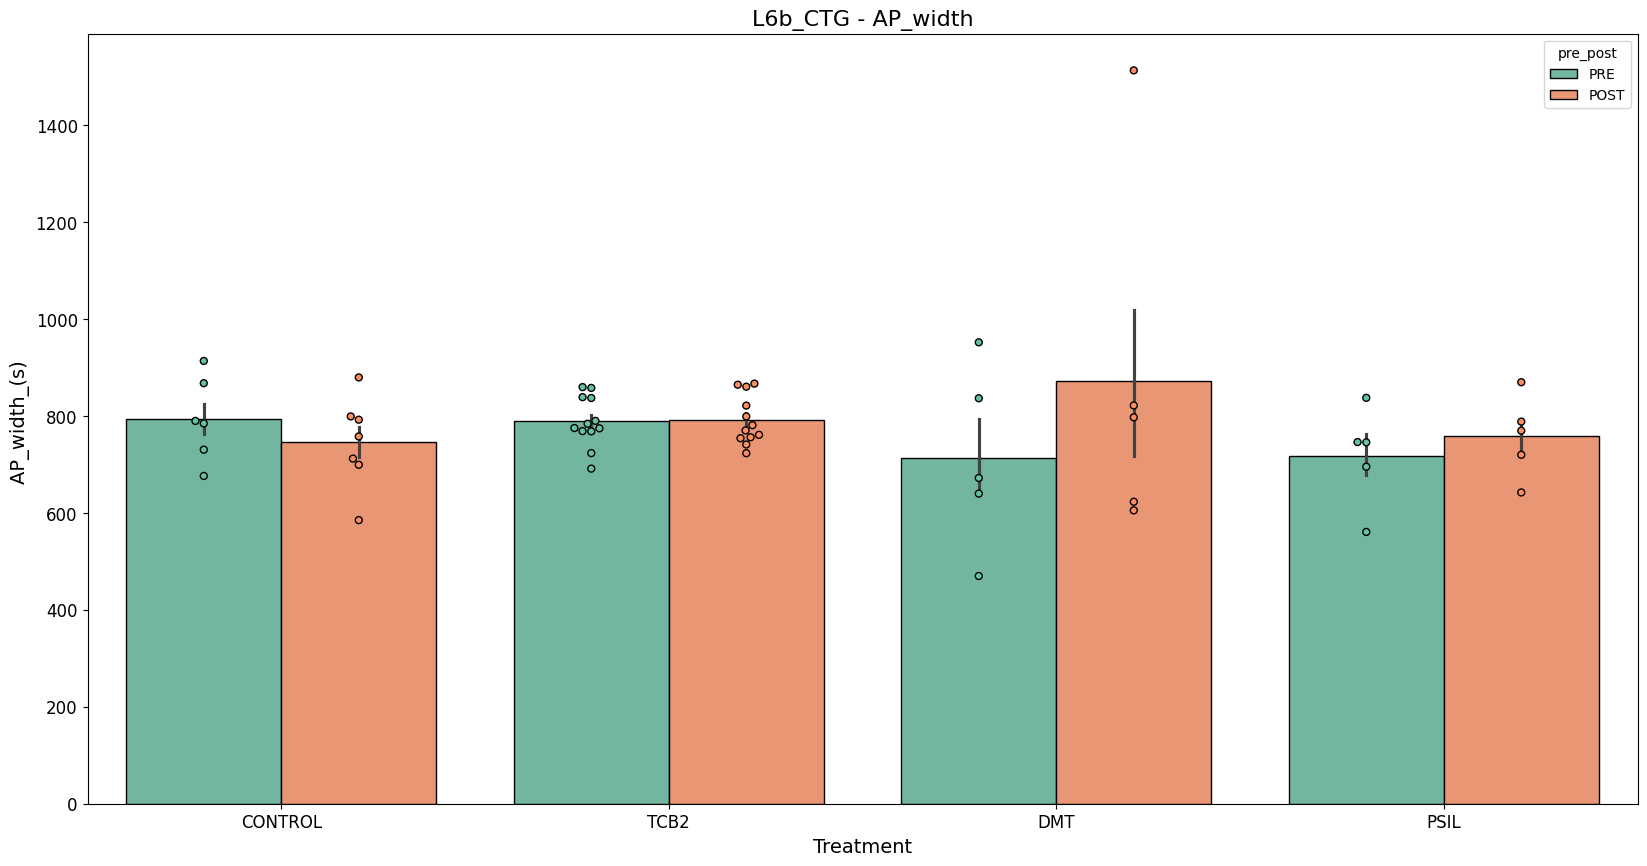

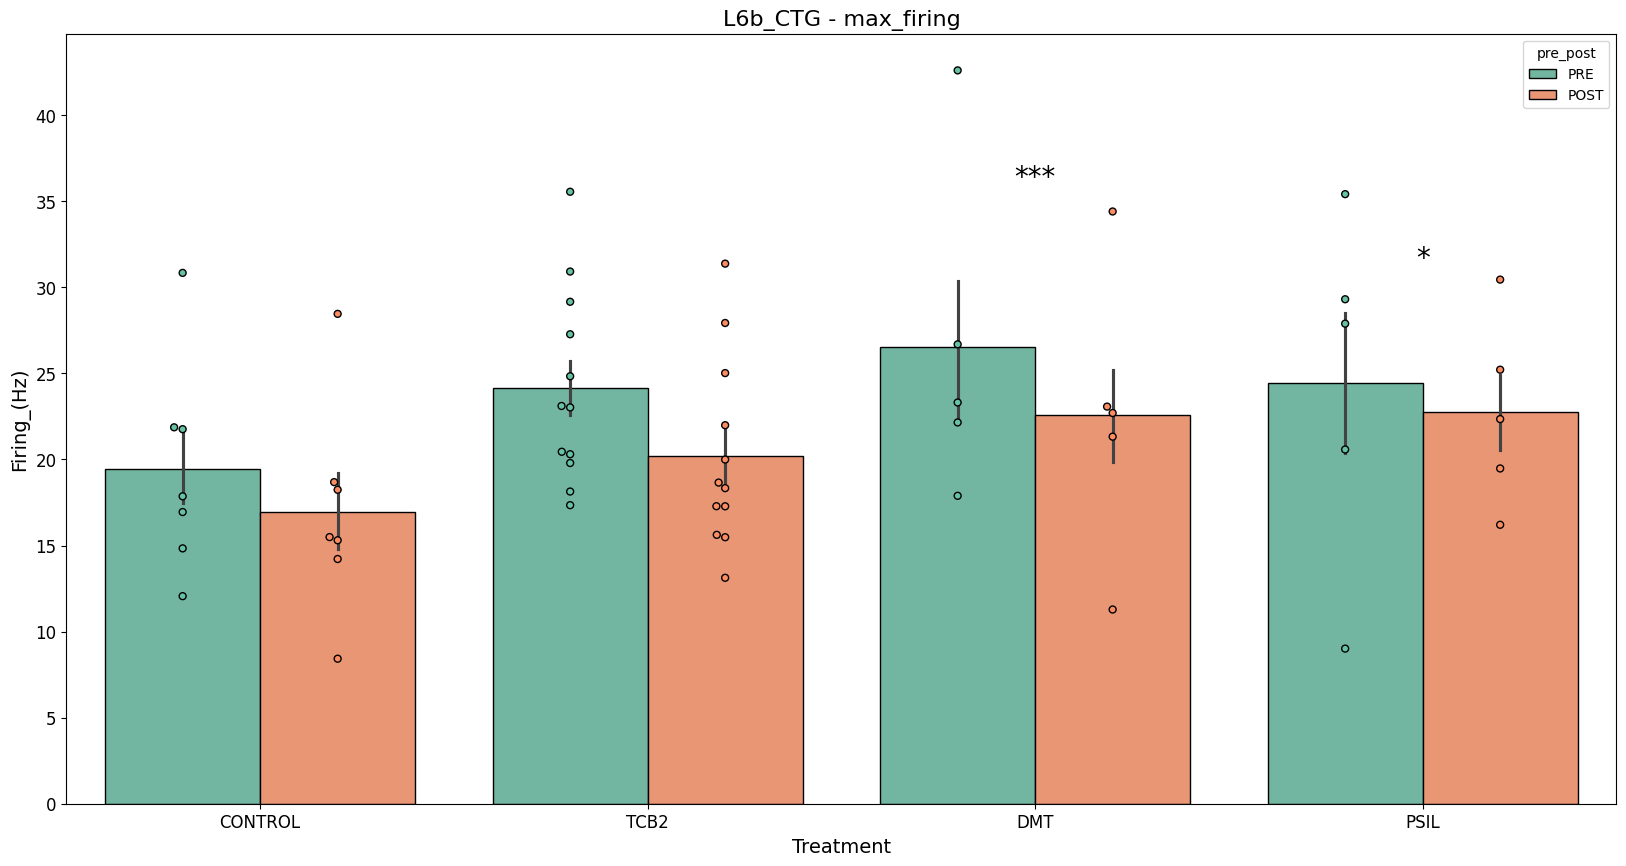

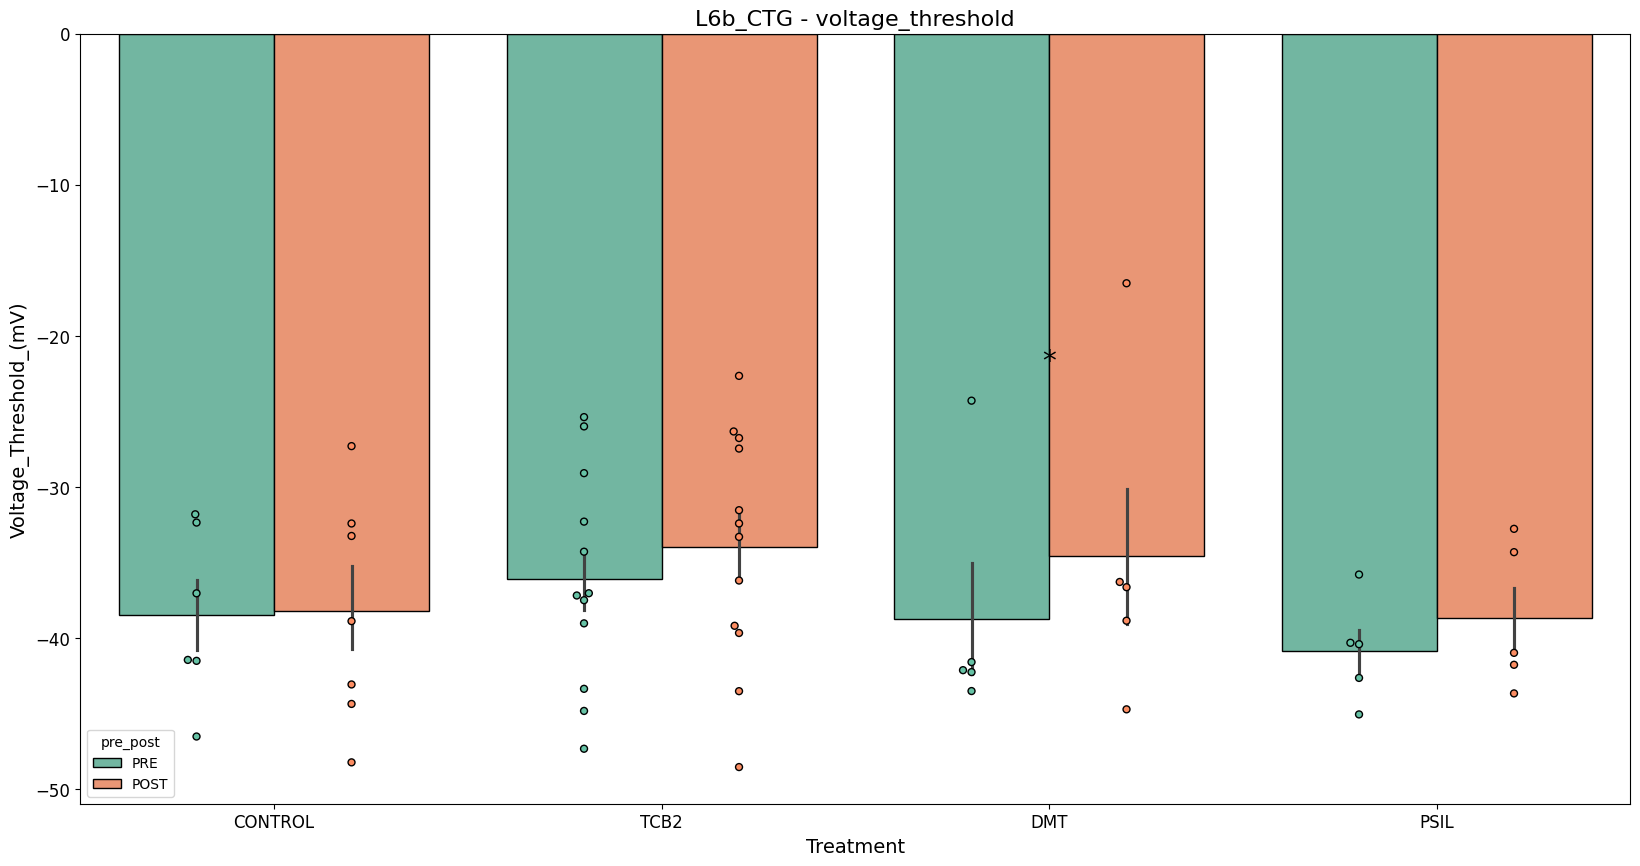

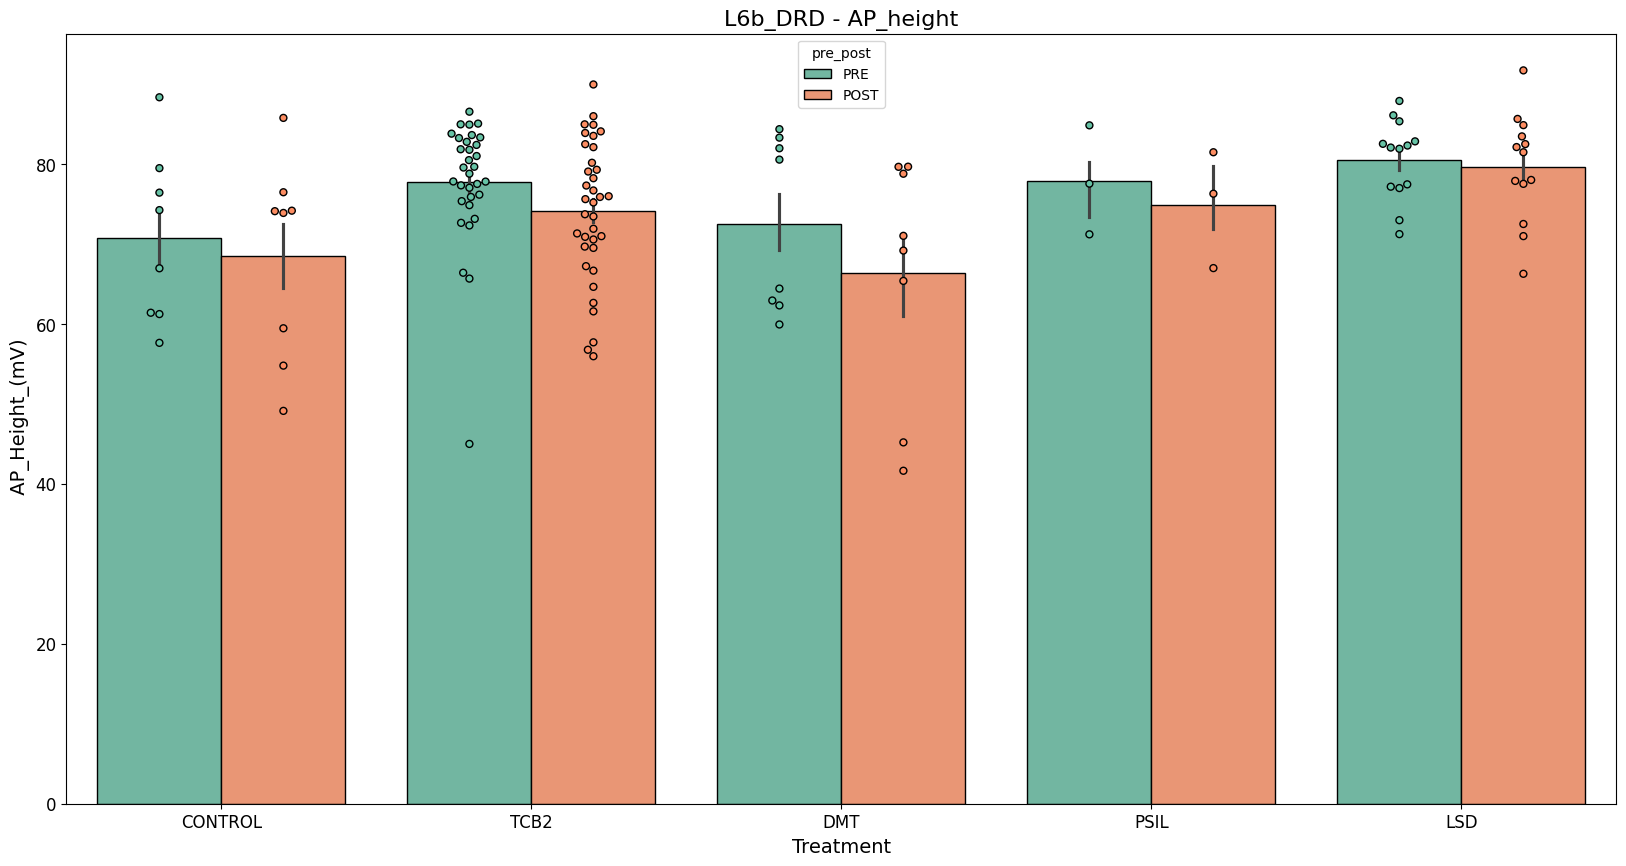

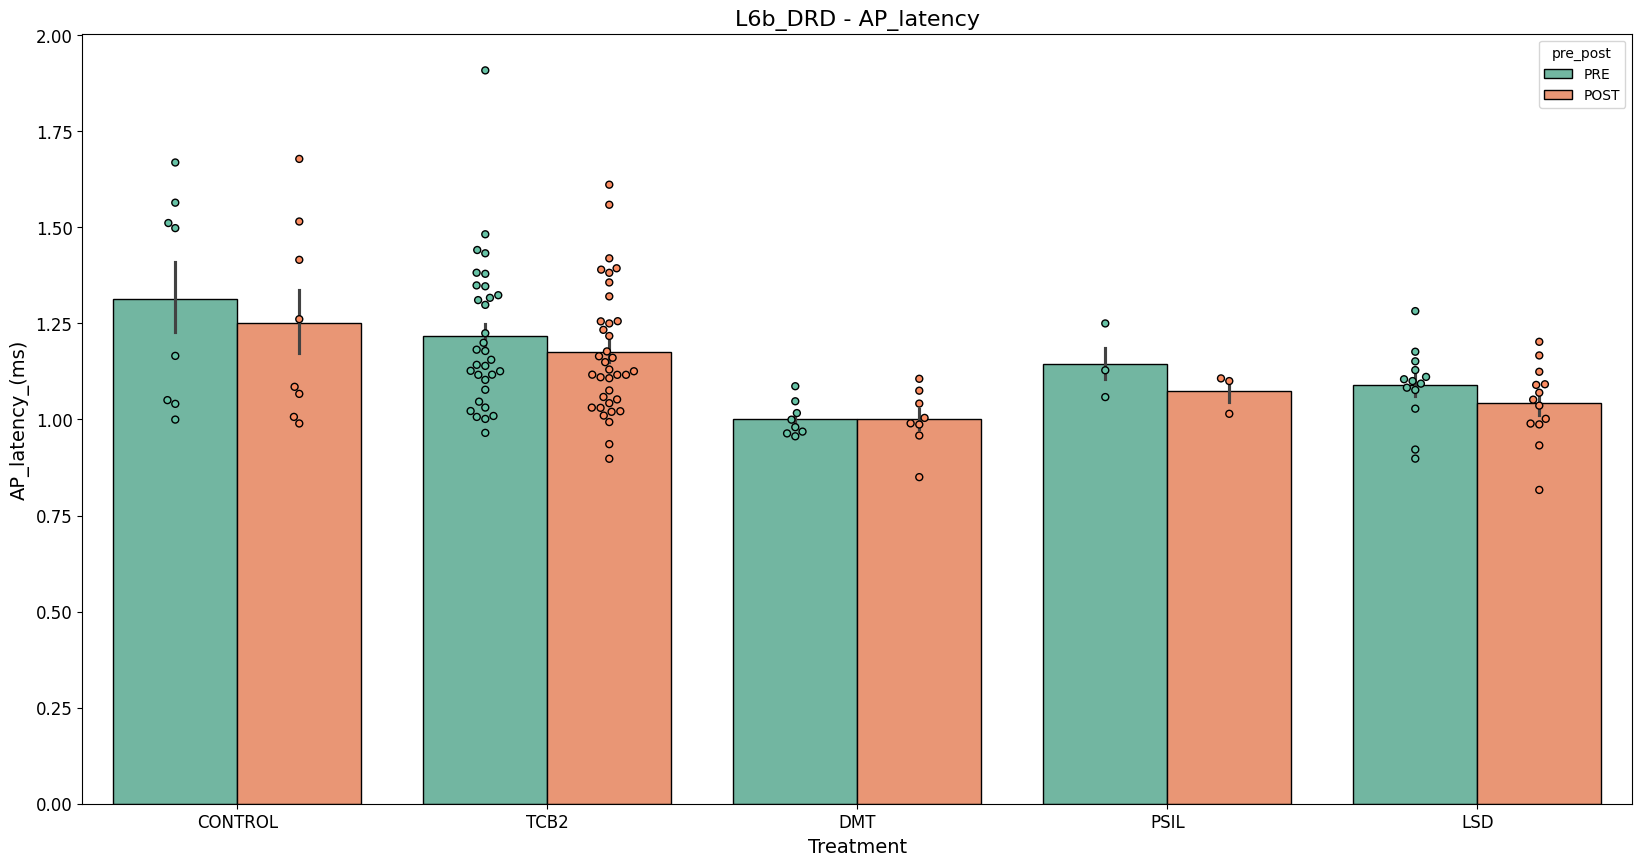

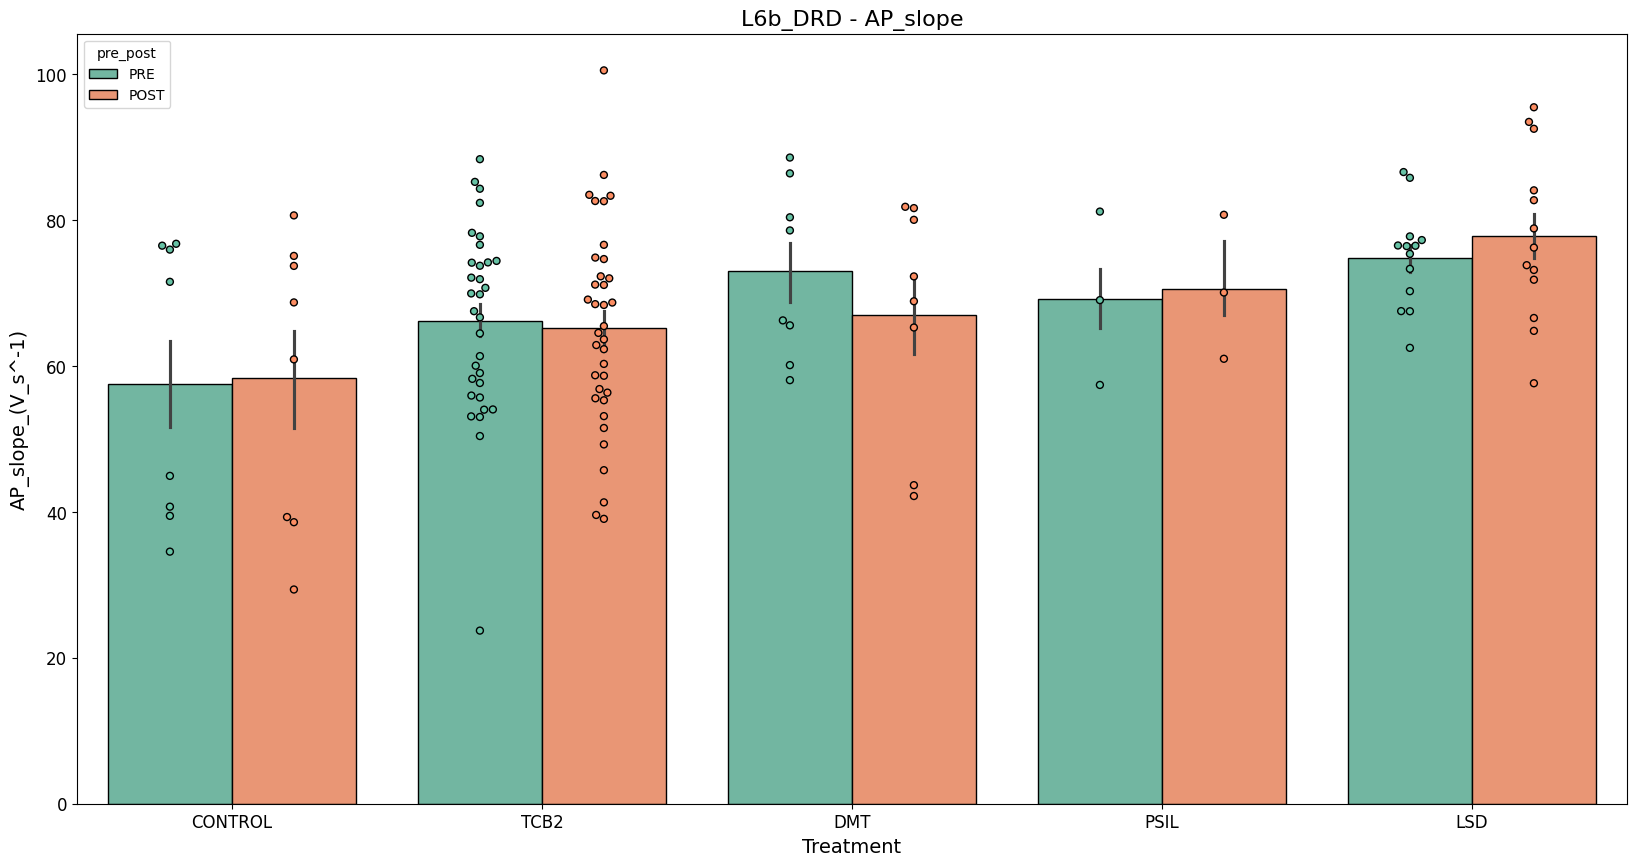

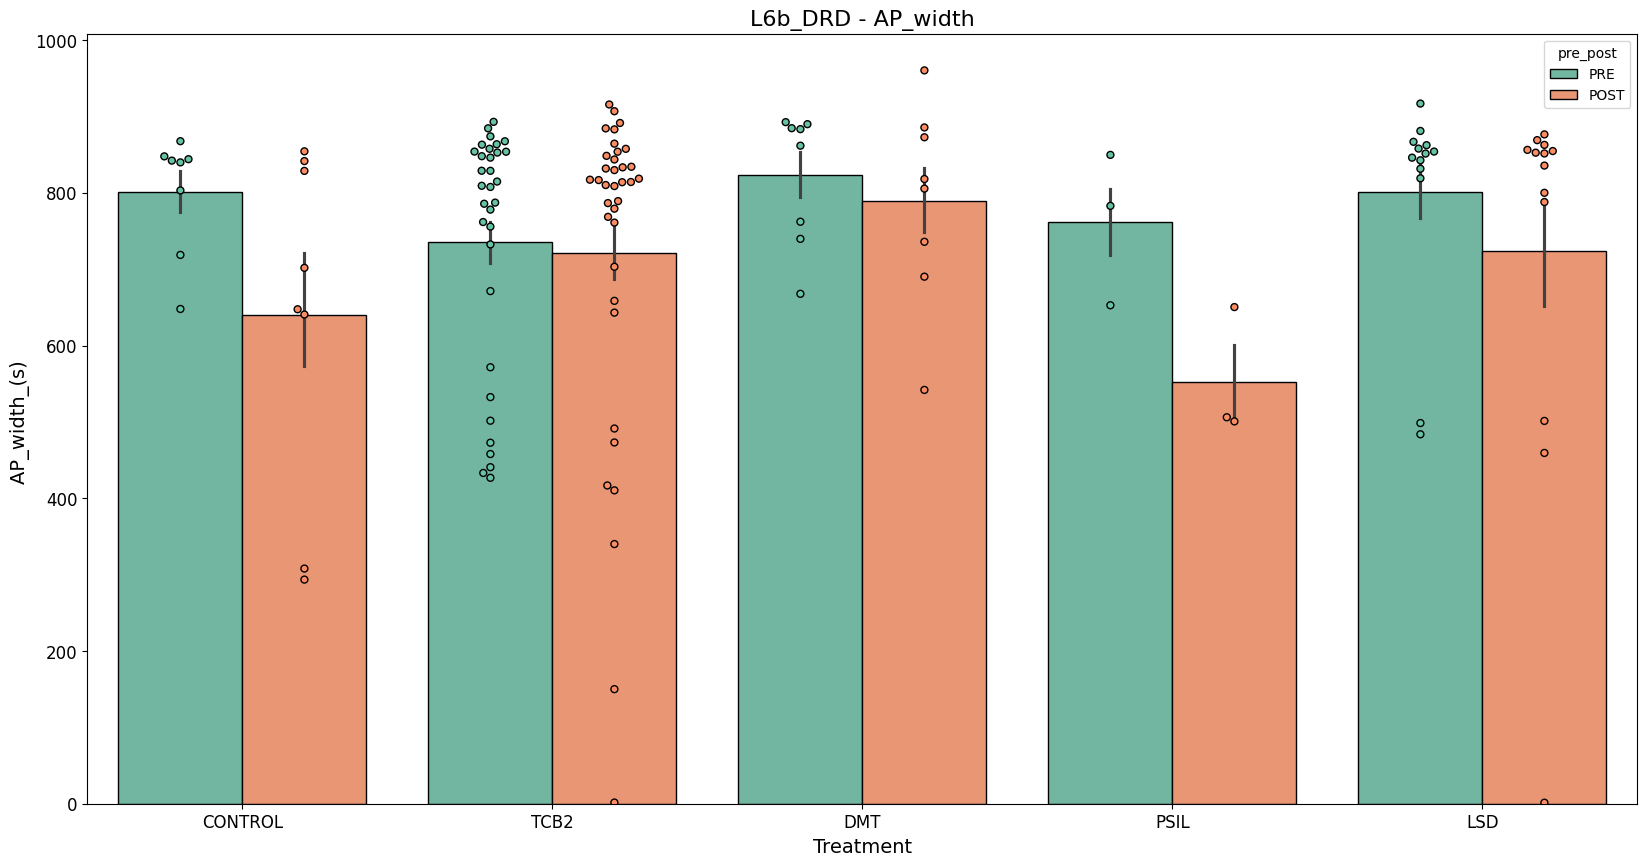

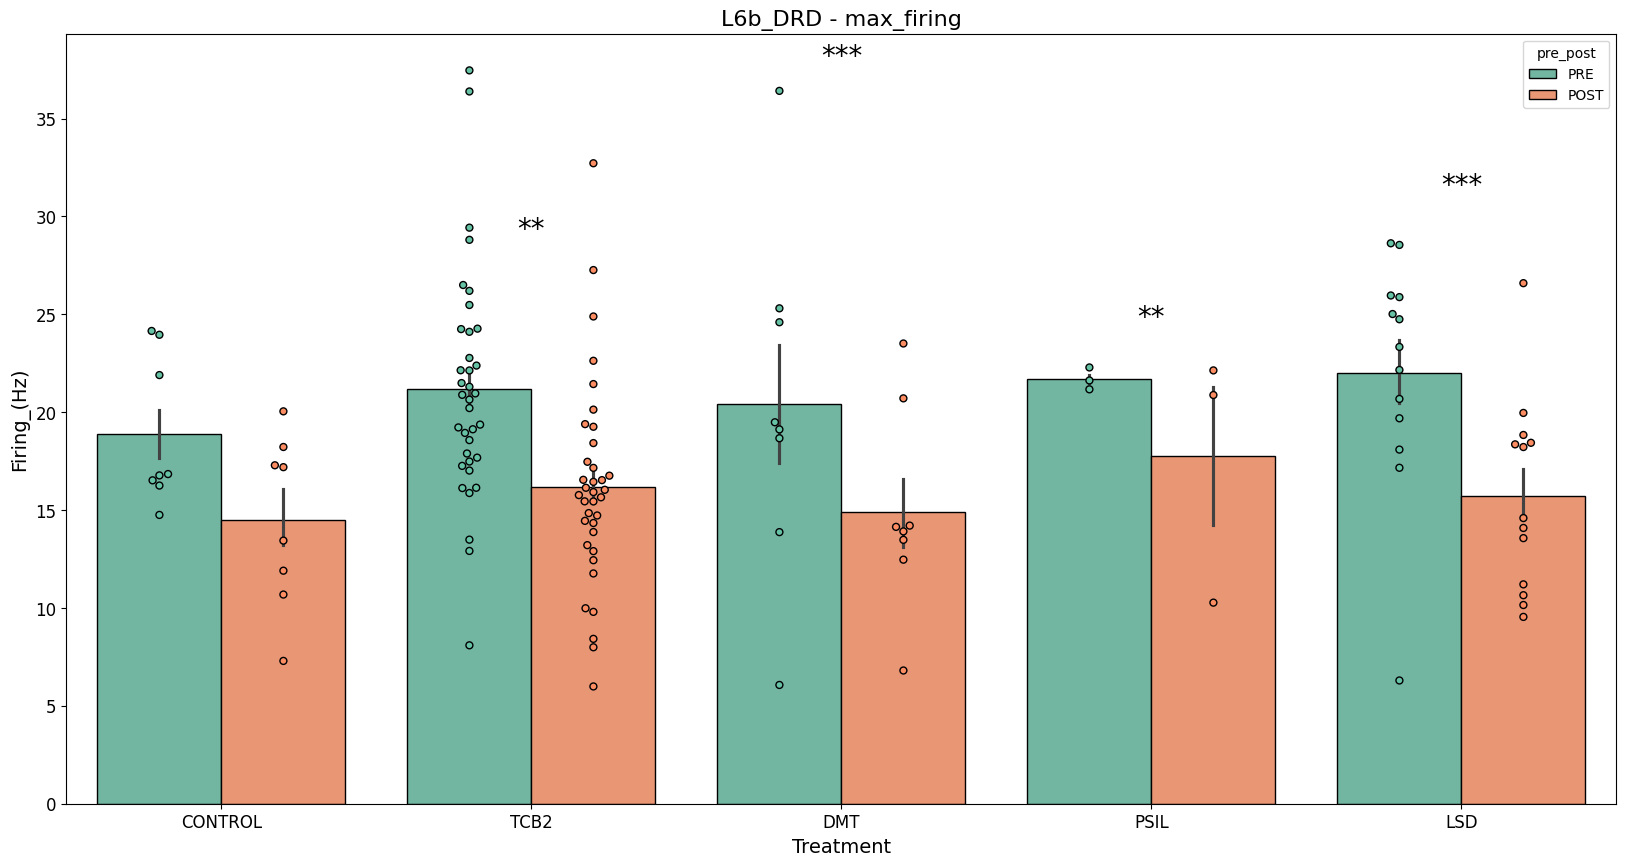

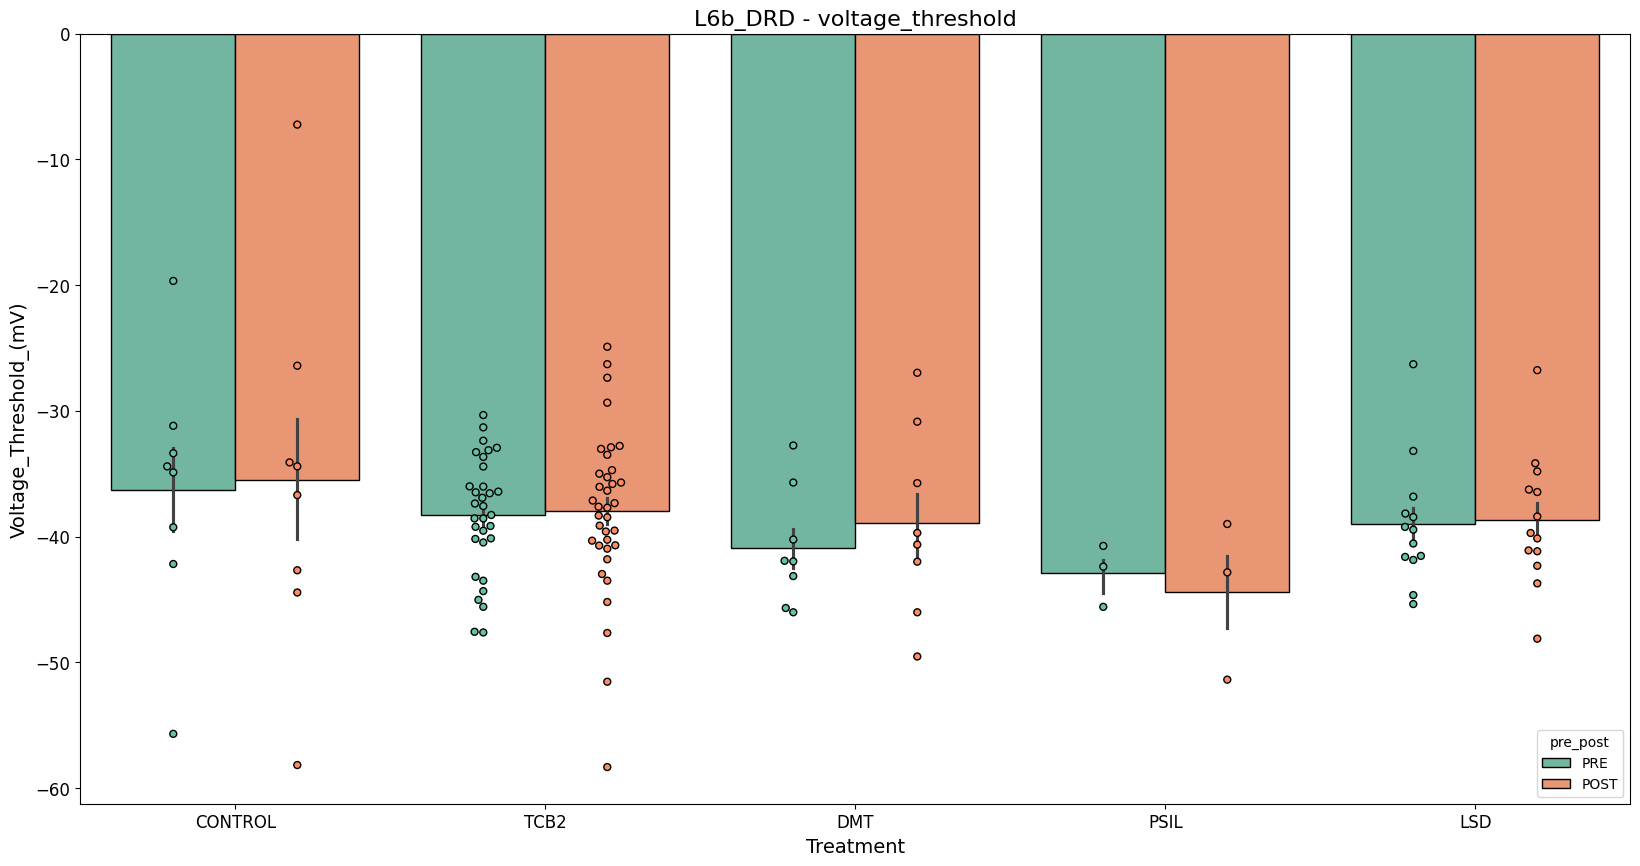

In [3]:
# GENERATE STATS DF
loopFP_stats(filename)

#BUILD FP HISTOGRAMS 
# build_FP_figs(filename) #also will create/update insufficient_data_tracking =getOrBuildDataTracking(filename)

In [ ]:
#APPLICATION TRACE PLOTTING
#FIX ME: allow for second aplication plotting also 


# getorbuildApplicationFig(filename, 'SIM230713a', from_scratch=True) #cell_df_or_id

import numpy as np
import pandas as pd
#loop over all AP files and build from scratch
# loopBuildAplicationFigs(filename) #FIX ME: run out of active memeory

# plot_all_FI_curves(feature_df,  color_dict)  # generates PDF with all FI curves for single cell labed with drug and aplication order #### MAKE HZ NOT APs per sweep also isnt it in pA not nA??
# plot_FI_AP_curves(feature_df) #generated PDF with FI-AP for each cell

def APP_loop_plotter(filename_or_df, getorbuild_plotter_function, from_scratch=True ):

    if not isinstance(filename_or_df, pd.DataFrame):
        expanded_df = getExpandedDf(filename) 
    else:
        filename_or_df=expanded_df
    
    for cell_id in expanded_df['cell_id'].unique(): #loop over all unique cell_ids 
        cell_df = getCellDf(expanded_df, cell_id, data_type = 'AP')
        getorbuild_plotter_function(filename, cell_df, from_scratch=from_scratch) #check use for second aplications in AP_MEan ect

    return

APP_loop_plotter(filename, getorbuildApplicationFig, from_scratch=True)

In [2]:
#Action Potential Investigation (AP)

#EXAMPLE USE
# getorbuildAP_MeanFig(filename, 'TLX210328a', from_scratch=True) #cell_id_or_cell_df
# getorbuildAP_HistogramFig(filename, cell_id_or_cell_df, from_scratch=True)
# getorbuildAP_PhasePlotFig(filename, cell_id_or_cell_df, from_scratch=True)
# getorbuildAP_PCAFig(filename, cell_id_or_cell_df, from_scratch=None

cell_type_expanded_df = getExpandedSubsetDf(filename, 'L6b_DRD', from_scratch=True)




cell_df = getCellDf(cell_type_expanded_df, 'DRD210310a', data_type='AP')

getorbuildAP_MeanFig(filename, cell_df, from_scratch=True) 
getorbuildAP_HistogramFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PhasePlotFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PCAFig(filename, cell_df, from_scratch=True) 
getorbuildApplicationFig(filename, 'TLX230416a', from_scratch=True)




BUILDING "L6b_DRD_expanded_df"
GETTING "feature_df" FROM "feature_df_py" CACHE
expanding on provided df


/Users/jasminebutler/Desktop/IGOR_phd/module/getters.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mouseline'] = df.cell_id.str[:3]


AP type file
JJB210225/t6
pAD detection complete .... 
AP type file
JJB210225/t16
pAD detection complete .... 
AP type file
JJB210225/t29
pAD detection complete .... 
AP type file
JJB210310/t7
pAD detection complete .... 
AP type file
JJB210310/t14
AP width calculation not accurate!!
pAD detection complete .... 
AP type file
JJB210310/t20
AP width calculation not accurate!!
AP width calculation not accurate!!
pAD detection complete .... 
AP type file
JJB210315/t3
pAD detection complete .... 
AP type file
JJB210315/t10
pAD detection complete .... 
AP type file
JJB210315/t12
pAD detection complete .... 
AP type file
JJB210318/t5
pAD detection complete .... 
AP type file
JJB210319/t6
pAD detection complete .... 
AP type file
JJB210319/t22
pAD detection complete .... 
AP type file
JJB210320/t4
pAD detection complete .... 
AP type file
JJB210320/t20
pAD detection complete .... 
AP type file
JJB210402/t10
pAD detection complete .... 
AP type file
JJB210402/t27
pAD detection complete .... 
FP

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210404/t3


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210404/t4


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB210404/t5
pAD detection complete .... 
FP type file
JJB210404/t6


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210404/t7


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB210404/t8
pAD detection complete .... 
FP type file
JJB210404/t18
FP type file
JJB210404/t19


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210404/t20


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB210404/t21
pAD detection complete .... 
FP type file
JJB210404/t22


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210404/t23


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210404/t24


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB210404/t26
pAD detection complete .... 
FP type file
JJB210504/t6


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210504/t7


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB210504/t8
pAD detection complete .... 
FP type file
JJB210504/t9
FP type file
JJB210504/t10
FP type file
JJB210504/t27
FP type file
JJB210504/t28
FP type file
JJB210504/t29
AP type file
JJB210504/t30
pAD detection complete .... 
FP type file
JJB210504/t32
FP type file
JJB210504/t33
AP type file
JJB210504/t35
pAD detection complete .... 
FP type file
JJB210504/t50


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210504/t51


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB210504/t52
pAD detection complete .... 
FP type file
JJB210504/t58


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210504/t59


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB210504/t62
pAD detection complete .... 
FP type file
JJB210604/t3
FP type file
JJB210604/t4
AP type file
JJB210604/t5
pAD detection complete .... 
FP type file
JJB210604/t6


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210604/t7


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210604/t18
FP type file
JJB210604/t20
AP type file
JJB210604/t21
pAD detection complete .... 
FP type file
JJB210604/t24
FP type file
JJB210604/t25
AP type file
JJB210604/t44
pAD detection complete .... 
FP type file
JJB210605/t4


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210605/t5


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210605/t6


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB210605/t8
pAD detection complete .... 
FP type file
JJB210605/t9


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB210605/t10
pAD detection complete .... 
FP type file
JJB210605/t27


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB210605/t28
pAD detection complete .... 
FP type file
JJB210605/t29


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210605/t30


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB210605/t32
FP type file
JJB210605/t33
AP type file
JJB210605/t34
pAD detection complete .... 
FP type file
JJB210605/t35
AP type file
JJB210605/t36
pAD detection complete .... 
FP type file
JJB221219/t7
FP type file
JJB221219/t8
no peaks found in trace..
FP type file
JJB221219/t9
AP type file
JJB221219/t12
pAD detection complete .... 
FP type file
JJB221219/t13
FP type file
JJB221219/t14


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB221219/t15
FP type file
JJB221219/t25
FP type file
JJB221219/t26
AP type file
JJB221219/t27
pAD detection complete .... 
FP type file
JJB221219/t29


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB221219/t30


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB221219/t31


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB221223/t6
no peaks found in trace..
FP type file
JJB221223/t7
FP type file
JJB221223/t8
AP type file
JJB221223/t9
pAD detection complete .... 
FP type file
JJB221223/t10
FP type file
JJB221223/t11
FP type file
JJB221223/t12
FP type file
JJB230104/t3
FP type file
JJB230104/t4
FP type file
JJB230104/t5
no peaks found in trace..
AP type file
JJB230104/t6
pAD detection complete .... 
FP type file
JJB230104/t7
FP type file
JJB230104/t8
FP type file
JJB230104/t9
AP type file
JJB230104/t10
pAD detection complete .... 
FP type file
JJB230104/t12
FP type file
JJB230104/t13
FP type file
JJB230104/t14
FP type file
JJB230104/t18
FP type file
JJB230104/t19
AP type file
JJB230104/t20
pAD detection complete .... 
FP type file
JJB230104/t22
FP type file
JJB230104/t23
AP type file
JJB230104/t24
pAD detection complete .... 
FP type file
JJB230104/t27
FP type file
JJB230104/t28


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230104/t29
AP type file
JJB230104/t30
pAD detection complete .... 
FP type file
JJB230104/t31
FP type file
JJB230104/t32
FP type file
JJB230104/t33
AP type file
JJB230104/t34
pAD detection complete .... 
FP type file
JJB230104/t35
FP type file
JJB230104/t36
FP type file
JJB230104/t37
FP type file
JJB230108/t3
FP type file
JJB230108/t4
FP type file
JJB230108/t5
AP type file
JJB230108/t6
pAD detection complete .... 
FP type file
JJB230108/t7
FP type file
JJB230108/t8
FP type file
JJB230108/t9
AP type file
JJB230108/t12
pAD detection complete .... 
FP type file
JJB230108/t13
FP type file
JJB230108/t14
FP type file
JJB230108/t15
FP type file
JJB230108/t19
FP type file
JJB230108/t20
FP type file
JJB230108/t21
AP type file
JJB230108/t25
pAD detection complete .... 
FP type file
JJB230108/t26
FP type file
JJB230108/t27
FP type file
JJB230108/t28
AP type file
JJB230108/t31
pAD detection complete .... 
FP type file
JJB230108/t32
FP type file
JJB230108/t33
FP type file
JJB230108/

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB230112/t18
pAD detection complete .... 
FP type file
JJB230112/t19


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230112/t20


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230112/t21


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230113/t5
FP type file
JJB230113/t6
no peaks found in trace..
FP type file
JJB230113/t7
I file not found, path: /Users/jasminebutler/Desktop/IGOR_phd/input/PatchData/JJB230113/t9Soma_outwave.ibw
AP type file
JJB230113/t9
pAD detection complete .... 
FP type file
JJB230113/t10
FP type file
JJB230113/t12
FP type file
JJB230113/t14
FP type file
JJB230115/t7
FP type file
JJB230115/t8
AP type file
JJB230115/t9
pAD detection complete .... 
FP type file
JJB230115/t10
FP type file
JJB230115/t11
FP type file
JJB230115/t12
AP type file
JJB230115/t13
pAD detection complete .... 
FP type file
JJB230115/t14
FP type file
JJB230115/t15
FP type file
JJB230115/t16
FP type file
JJB230115/t17
FP type file
JJB230115/t18
FP type file
JJB230115/t19
AP type file
JJB230115/t21
pAD detection complete .... 
FP type file
JJB230115/t20
FP type file
JJB230115/t22
FP type file
JJB230115/t24
AP type file
JJB230115/t21
pAD detection complete .... 
FP type file
JJB230117/t5
FP type file
JJB230117/t6
FP

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230126/t5
I file not found, path: /Users/jasminebutler/Desktop/IGOR_phd/input/PatchData/JJB230126/t7Soma_outwave.ibw
AP type file
JJB230126/t7
pAD detection complete .... 
FP type file
JJB230126/t8
FP type file
JJB230126/t9
FP type file
JJB230126/t10
FP type file
JJB230126/t13
FP type file
JJB230126/t14
FP type file
JJB230126/t15
AP type file
JJB230126/t16
pAD detection complete .... 
FP type file
JJB230126/t17
FP type file
JJB230126/t18
FP type file
JJB230126/t19
FP type file
JJB230126/t22
FP type file
JJB230126/t23
FP type file
JJB230126/t24
AP type file
JJB230126/t25
pAD detection complete .... 
FP type file
JJB230126/t26
FP type file
JJB230126/t27
FP type file
JJB230126/t28
FP type file
JJB230126/t32
FP type file
JJB230126/t33
FP type file
JJB230126/t34
FP type file
JJB230126/t35
FP type file
JJB230126/t36
FP type file
JJB230126/t37
FP type file
JJB230126/t38
FP type file
JJB230126/t39
FP type file
JJB230126/t40
FP type file
JJB230126/t41
FP type file
JJB230126/t42


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230308/t25


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230308/t26


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230308/t28


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB230308/t31
pAD detection complete .... 
FP type file
JJB230308/t24


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230308/t25


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230308/t26


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230308/t28


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230309/t7
FP type file
JJB230309/t8
FP type file
JJB230309/t9
FP type file
JJB230309/t10
AP type file
JJB230309/t14
pAD detection complete .... 
FP type file
JJB230309/t15
FP type file
JJB230309/t16


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230309/t18
FP type file
JJB230309/t19
FP type file
JJB230309/t27
FP type file
JJB230309/t28
FP type file
JJB230309/t29
AP type file
JJB230309/t31
pAD detection complete .... 
FP type file
JJB230309/t32
FP type file
JJB230309/t33
FP type file
JJB230309/t34
FP type file
JJB230322/t5
FP type file
JJB230322/t6
FP type file
JJB230322/t7
FP type file
JJB230322/t8
AP type file
JJB230322/t9
pAD detection complete .... 
FP type file
JJB230322/t10
FP type file
JJB230322/t11
FP type file
JJB230322/t13
FP type file
JJB230322/t15
FP type file
JJB230322/t21
FP type file
JJB230322/t22
FP type file
JJB230322/t23
AP type file
JJB230322/t24
pAD detection complete .... 
FP type file
JJB230322/t25
FP type file
JJB230322/t26
FP type file
JJB230322/t27
FP type file
JJB230322/t31
FP type file
JJB230322/t32
FP type file
JJB230322/t33
FP type file
JJB230322/t34
AP type file
JJB230322/t35
pAD detection complete .... 
FP type file
JJB230322/t36
FP type file
JJB230322/t37
FP type file
JJB230322/t3

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230423/t33
AP type file
JJB230423/t34
pAD detection complete .... 
FP type file
JJB230423/t35


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230423/t36


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230423/t37


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230423/t42
FP type file
JJB230423/t43
FP type file
JJB230423/t44
AP type file
JJB230423/t45
pAD detection complete .... 
FP type file
JJB230423/t47


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230423/t48


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230423/t49
FP type file
JJB230425/t6
FP type file
JJB230425/t7
FP type file
JJB230425/t8
AP type file
JJB230425/t9
pAD detection complete .... 
FP type file
JJB230425/t10
FP type file
JJB230425/t12
FP type file
JJB230425/t13
AP type file
JJB230425/t14
pAD detection complete .... 
AP type file
JJB230425/t23
pAD detection complete .... 
FP type file
JJB230616/t5
FP type file
JJB230616/t6
FP type file
JJB230616/t7
AP type file
JJB230616/t8
pAD detection complete .... 
FP type file
JJB230616/t9
FP type file
JJB230616/t10
FP type file
JJB230616/t11
FP type file
JJB230616/t18
FP type file
JJB230616/t19
FP type file
JJB230616/t20
AP type file
JJB230616/t21
pAD detection complete .... 
FP type file
JJB230616/t22
FP type file
JJB230616/t23
FP type file
JJB230616/t25
FP type file
JJB230616/t28
FP type file
JJB230616/t29
FP type file
JJB230616/t30
AP type file
JJB230616/t31
pAD detection complete .... 
FP type file
JJB230616/t32
FP type file
JJB230616/t33
FP type file
JJB230616/t3

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


Spike found in Sag analysis, skipping
FP type file
JJB230606/t20
FP type file
JJB230606/t21
AP type file
JJB230606/t22
pAD detection complete .... 
FP type file
JJB230606/t23
FP type file
JJB230626/t5
FP type file
JJB230626/t6
FP type file
JJB230626/t7
AP type file
JJB230626/t8
pAD detection complete .... 
FP type file
JJB230626/t9
FP type file
JJB230626/t10
FP type file
JJB230626/t23
FP type file
JJB230626/t24
FP type file
JJB230626/t25
AP type file
JJB230626/t26
pAD detection complete .... 
FP type file
JJB230626/t27
FP type file
JJB230626/t28
FP type file
JJB230626/t29
FP type file
JJB230703/t5


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230703/t6


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230703/t7


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB230703/t8
pAD detection complete .... 
FP type file
JJB230703/t9
no peaks found in trace..
Spike found in Sag analysis, skipping
FP type file
JJB230703/t10


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230703/t12


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230703/t15
FP type file
JJB230703/t16
FP type file
JJB230703/t17
AP type file
JJB230703/t18
pAD detection complete .... 
FP type file
JJB230703/t19


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230703/t20


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230703/t21


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230703/t23
FP type file
JJB230703/t24
FP type file
JJB230703/t25
AP type file
JJB230703/t26
pAD detection complete .... 
FP type file
JJB230703/t27
FP type file
JJB230703/t28
FP type file
JJB230703/t29
FP type file
JJB230703/t30
FP type file
JJB230703/t31
FP type file
JJB230703/t32
AP type file
JJB230703/t33
pAD detection complete .... 
FP type file
JJB230703/t34


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230703/t35
FP type file
JJB230703/t36


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230714/t6
FP type file
JJB230714/t7
FP type file
JJB230714/t8
AP type file
JJB230714/t9
pAD detection complete .... 
FP type file
JJB230714/t10
FP type file
JJB230714/t11
FP type file
JJB230714/t12
FP type file
JJB230714/t14


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230714/t15


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230714/t17


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB230714/t18
pAD detection complete .... 
FP type file
JJB230714/t19


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230714/t20


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230714/t21


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230714/t23


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230714/t24
FP type file
JJB230714/t25
AP type file
JJB230714/t26
pAD detection complete .... 
FP type file
JJB230714/t27


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230714/t28


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230714/t29


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230714/t30
FP type file
JJB230714/t31
FP type file
JJB230714/t32
AP type file
JJB230714/t33
pAD detection complete .... 
FP type file
JJB230714/t34
no peaks found in trace..
FP type file
JJB230714/t35
FP type file
JJB230714/t36
FP type file
JJB230724/t4
FP type file
JJB230724/t5
FP type file
JJB230724/t6
AP type file
JJB230724/t7
pAD detection complete .... 
FP type file
JJB230724/t8
FP type file
JJB230724/t9
FP type file
JJB230724/t11
FP type file
JJB230724/t12
FP type file
JJB230724/t13
FP type file
JJB230724/t14
AP type file
JJB230724/t15
pAD detection complete .... 
FP type file
JJB230724/t16
FP type file
JJB230724/t17
FP type file
JJB230724/t18
FP type file
JJB230728/t4
FP type file
JJB230728/t5
FP type file
JJB230728/t6
AP type file
JJB230728/t7
pAD detection complete .... 
FP type file
JJB230728/t8
FP type file
JJB230728/t9
FP type file
JJB230728/t10
FP type file
JJB230728/t13
FP type file
JJB230728/t14
AP type file
JJB230728/t15
pAD detection complete .... 
FP t

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230728/t17


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230728/t18
FP type file
JJB230728/t19
FP type file
JJB230728/t20
AP type file
JJB230728/t21
pAD detection complete .... 
FP type file
JJB230728/t22
FP type file
JJB230728/t23
FP type file
JJB230728/t24
FP type file
JJB230801/t4


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230801/t5


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230801/t6
AP type file
JJB230801/t7
pAD detection complete .... 
FP type file
JJB230801/t8


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230801/t9


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230801/t10


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230801/t15
FP type file
JJB230801/t16
FP type file
JJB230801/t17
AP type file
JJB230801/t18
pAD detection complete .... 
FP type file
JJB230801/t20
FP type file
JJB230801/t21
FP type file
JJB230801/t22
JJB230801/t23 data_type pAD
JJB230801/t24 data_type pAD
FP type file
JJB230801/t26
FP type file
JJB230801/t27
FP type file
JJB230801/t28
AP type file
JJB230801/t29
pAD detection complete .... 
FP type file
JJB230801/t30


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230801/t31
FP type file
JJB230801/t32


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230801/t34
FP type file
JJB230801/t35
FP type file
JJB230801/t36
AP type file
JJB230801/t37
pAD detection complete .... 
FP type file
JJB230801/t38
FP type file
JJB230801/t39
FP type file
JJB230801/t40
FP type file
JJB230802/t4
FP type file
JJB230802/t5
FP type file
JJB230802/t6
AP type file
JJB230802/t7
pAD detection complete .... 
FP type file
JJB230802/t8
FP type file
JJB230802/t9
FP type file
JJB230802/t10
FP type file
JJB230802/t13
FP type file
JJB230802/t15
FP type file
JJB230802/t16
AP type file
JJB230802/t17
pAD detection complete .... 
FP type file
JJB230802/t18
FP type file
JJB230802/t19
FP type file
JJB230802/t20
FP type file
JJB230802/t24


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230802/t26


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230802/t27


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB230802/t28
pAD detection complete .... 
FP type file
JJB230802/t29


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230802/t30


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230802/t31


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230802/t32


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230802/t33


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230802/t34


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB230802/t35
pAD detection complete .... 
FP type file
JJB230802/t36
no peaks found in trace..
Spike found in Sag analysis, skipping


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230802/t37


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230802/t38


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t3
FP type file
JJB230823/t4
FP type file
JJB230823/t5
AP type file
JJB230823/t6
pAD detection complete .... 
FP type file
JJB230823/t7
FP type file
JJB230823/t8
FP type file
JJB230823/t9
FP type file
JJB230823/t11
FP type file
JJB230823/t12
FP type file
JJB230823/t13
AP type file
JJB230823/t14
pAD detection complete .... 
FP type file
JJB230823/t15


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t17
FP type file
JJB230823/t18
FP type file
JJB230823/t20


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t21


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t22


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB230823/t23
pAD detection complete .... 
FP type file
JJB230823/t24


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t25


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t26


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t28
FP type file
JJB230823/t29
FP type file
JJB230823/t30
AP type file
JJB230823/t31
pAD detection complete .... 
FP type file
JJB230823/t32


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t33
FP type file
JJB230823/t34
FP type file
JJB230823/t38


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t39


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t40


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


AP type file
JJB230823/t41
pAD detection complete .... 
FP type file
JJB230823/t42


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t43


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230823/t44


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230827/t4
FP type file
JJB230827/t5
FP type file
JJB230827/t6
AP type file
JJB230827/t7
pAD detection complete .... 
FP type file
JJB230827/t8
FP type file
JJB230827/t9
FP type file
JJB230827/t10
FP type file
JJB230827/t11
FP type file
JJB230827/t12
AP type file
JJB230827/t13
pAD detection complete .... 
FP type file
JJB230827/t14
FP type file
JJB230827/t15
FP type file
JJB230827/t16
FP type file
JJB230827/t18
FP type file
JJB230827/t19
FP type file
JJB230827/t20
AP type file
JJB230827/t21
pAD detection complete .... 
FP type file
JJB230827/t22


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230827/t23


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230827/t24


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230911/t5
FP type file
JJB230911/t6
FP type file
JJB230911/t7
AP type file
JJB230911/t8
pAD detection complete .... 
FP type file
JJB230911/t9
FP type file
JJB230911/t10
FP type file
JJB230911/t11
FP type file
JJB230911/t13
FP type file
JJB230911/t14
FP type file
JJB230911/t15
AP type file
JJB230911/t16
pAD detection complete .... 
FP type file
JJB230911/t17
FP type file
JJB230911/t18
FP type file
JJB230911/t19
FP type file
JJB230911/t21
FP type file
JJB230911/t22
FP type file
JJB230911/t23
AP type file
JJB230911/t24
pAD detection complete .... 
FP type file
JJB230911/t25


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


FP type file
JJB230911/t26
FP type file
JJB230911/t27
FP type file
JJB230911/t28
FP type file
JJB230911/t29
FP type file
JJB230911/t30
AP type file
JJB230911/t31
pAD detection complete .... 
FP type file
JJB230911/t32
FP type file
JJB230911/t33
FP type file
JJB230911/t34
CREATED /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/L6b_DRD_expanded_df.pkl CACHE


AttributeError: 'DataFrame' object has no attribute 'split'

In [6]:
#this function is dependant on values from feature_df_expanded
#this will generate all plots that could also be gotten by getorbuildHistogram(finename, identifier) #FIX ME
loopFP_stats(filename)
#RuntimeWarning: Mean of empty slice. #FIX ME

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.v

Insufficient data for L5a_CBLforFiring_(Hz)
Insufficient data for L5a_CBLforVoltage_Threshold_(mV)
Insufficient data for L5a_CBLfor AP_Height_(mV)
Insufficient data for L5a_CBLforAP_slope_(V_s^-1)
Insufficient data for L5a_CBLforAP_width_(s) 
Insufficient data for L5a_CBLforAP_latency_(ms)
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PRE vs. CONTROL: Custom statistical test, P_val:4.168e-02
PRE vs. TCB2: Custom statistical test, P_val:4.161e-02
PRE vs. LSD: Custom statistical test, P_val:1.977e-03
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).png
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PR

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5a_TLX with MDL application 
Insuficient data for L5a_TLX with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_CBL with TCB2 application 
Insuficient data for L5b_SIM with CONTROL application 
Insuficient data for L5b_SIM with DMT application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5b_SIM with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_int with TCB2 application 
Insuficient data for L6b _DRD with CONTROL application 
Insuficient data for L6b _DRD with LSD application 
Insuficient data for L6b_ with TCB2 application 
Insuficient data for L6b_5HT_ with MDL application 
Insuficient data for L6b_5HT_ with TCB2 application 
Insuficient data for L6b_CTG with CONTROL application 
Insuficient data for L6b_CTG with LSD application 
Insuficient data for L6b_CTG with MDL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.png
Insuficient data for L6b_DRD with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.png


,folder_file,cell_id,data_type,drug,replication_no,application_order,drug_in,drug_out,I_set,R_series,...,mean_AP_slope_file,mean_AP_width_file,mean_AP_latency_file,max_firing_cell_drug,voltage_threshold_cell_drug,AP_height_cell_drug,AP_slope_cell_drug,AP_width_cell_drug,AP_latency_cell_drug,first_drug_AP
906,JJB230509/t11,CBL230509b,FP,PRE,1,0,NaN,NaN,NaN,47.0,...,82.629766,704.375000,0.975000,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
907,JJB230509/t12,CBL230509b,FP,PRE,2,0,NaN,NaN,NaN,44.0,...,90.947657,841.000000,0.866667,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
908,JJB230509/t13,CBL230509b,FP,PRE,3,0,NaN,NaN,NaN,44.0,...,87.167019,789.828571,0.871429,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
905,JJB230509/t8,CBL230509a,AP,TCB2,1,1,21.0,35.0,short step,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,JJB230509/t15,CBL230509b,AP,TCB2,1,1,9.0,22.0,short step,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,JJB230126/t42,DRD230126c,FP_AP,WASH,11,1,8.0,NaN,NaN,NaN,...,44.853426,767.400000,1.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,JJB230126/t43,DRD230126c,FP_AP,WASH,12,1,10.0,NaN,NaN,NaN,...,45.551643,685.200000,1.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,JJB230301/t19,DRD230301a,FP_AP,WASH,14,1,NaN,NaN,NaN,73.0,...,65.450391,843.366667,1.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,JJB230301/t20,DRD230301a,FP_AP,WASH,15,1,NaN,NaN,NaN,73.0,...,63.155565,884.650000,1.175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
